Connected to CHsolvers (Python 3.9.20)

In [ ]:
from scipy.stats import gaussian_kde
import ast
from itertools import combinations
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
indir = "/Users/smgroves/Documents/GitHub/Cahn_Hilliard_Model/plotting"


def make_long_dist_df(indir, file):
    # dist = pd.read_csv(f"{indir}/distance_between_droplets.csv",converters={'distances': pd.eval})
    dist = pd.read_csv(f"{indir}/{file}", header=0)
    long_dist_df = pd.DataFrame(
        # columns=["seed", "cpc", 'cohesin', 'time', 'distance'])
        columns=["cpc", "cohesin", "distance"]
    )

    for i, r in dist.iterrows():
        dist_list = str(r["distances"])[1:-2].split(" ")
        try:
            dist_list = [float(d) for d in dist_list]
            for d in dist_list:
                long_dist_df = pd.concat(
                    [
                        long_dist_df,
                        pd.DataFrame(
                            {
                                # "seed": [r["seed"]],
                                # "time": [r["time"]],
                                "cpc": [r["cpc"]],
                                "cohesin": [r["cohesin"]],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except ValueError:
            pass
    return long_dist_df

<ipython-input-2-f0e05b4d9111>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-3-cf4bf3782fa0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-3-cf4bf3782fa0>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


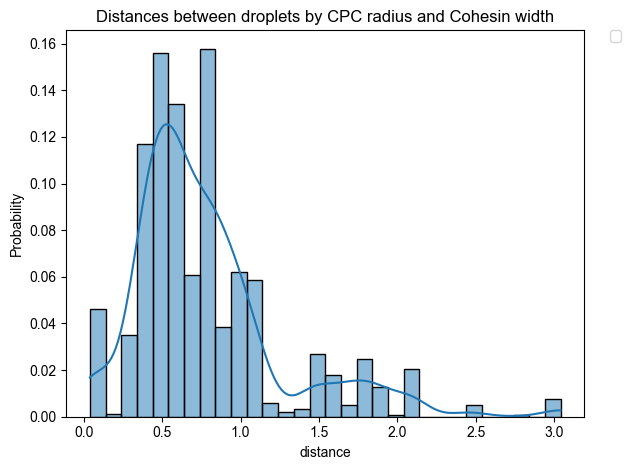

In [ ]:
long_dist_df = make_long_dist_df(
    indir,
    "simulated_droplet_distributions/simulated_droplet_distances_e_0.01_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}distances_between_droplets_swarmplot_0.0075.png")

In [ ]:
# outdir = (
#     f"{indir}/radii_lineplots_kymographs/domain_0_2_from_rivanna_kymographs_e_0.0075/"
# )

# long_dist_df = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_domain_0_2_chr_lengths.csv",
# )
# sns.histplot(
#     data=long_dist_df, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
# outdir = f"{indir}/radii_lineplots_kymographs/domain_0_1_eps_0.0075/"

# long_dist_df2 = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_domain_0_1_chr_lengths.csv",
# )
# sns.histplot(
#     data=long_dist_df2, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
long_dist_df2 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_noisy_cohesin_sd_0.11.csv",
)

<ipython-input-2-f0e05b4d9111>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(


<ipython-input-7-d4d82d0265be>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


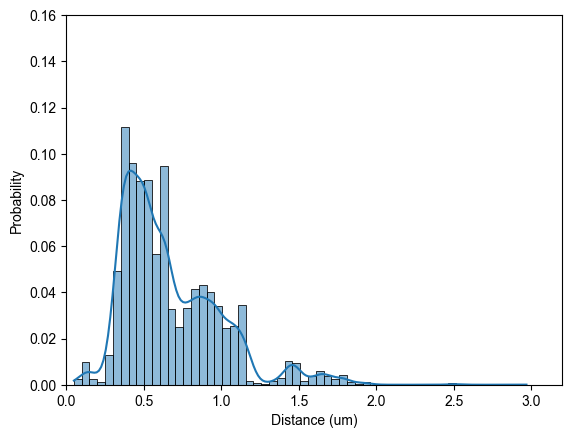

In [ ]:
outdir = f"{indir}/radii_lineplots_kymographs/domain_0_2_noisy_cohesin_sd_0.11"

sns.histplot(
    data=long_dist_df2,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.05,
    stat="probability",
    common_norm=False,
    kde=True,
)
plt.xlabel("Distance (um)")
plt.ylim(0, 0.16)
plt.xlim(0, 3.2)
# plt.tight_layout()
# plt.savefig(f"{outdir}/sim_histplot_eps_0.0075_bin_0.05.pdf")
plt.show()

<ipython-input-8-26f4f99d5e43>:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.swarmplot(


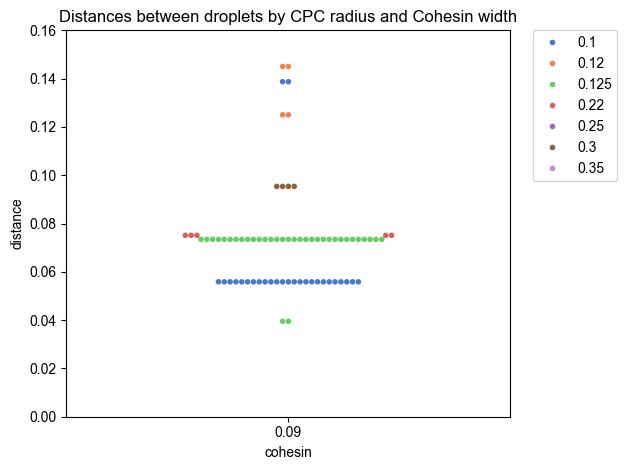

In [ ]:
sns.swarmplot(
    data=long_dist_df,
    x="cohesin",
    y="distance",
    hue="cpc",
    palette=sns.color_palette("muted"),
    size=4,
)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.ylim(0, 0.16)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-f0e05b4d9111>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-9-e65656cc6fef>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-9-e65656cc6fef>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


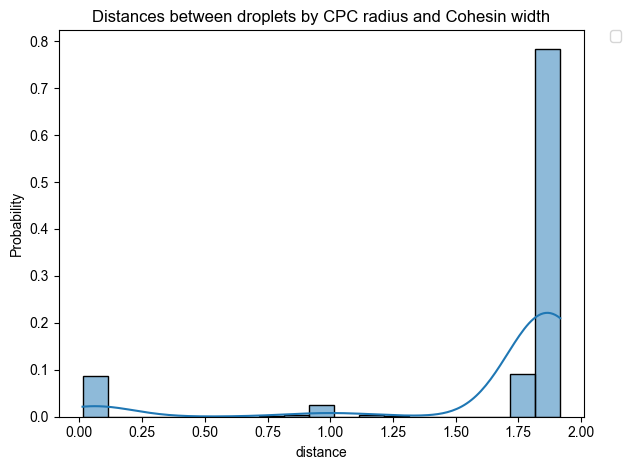

In [ ]:
long_dist_df3 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.005_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df3,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-f0e05b4d9111>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-10-5deb2d1a27cb>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-10-5deb2d1a27cb>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


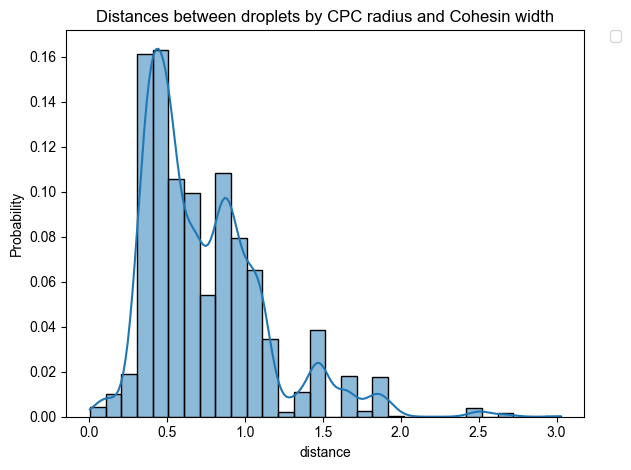

In [ ]:
long_dist_df4 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.008_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df4,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-f0e05b4d9111>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-11-046a7862cc35>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-11-046a7862cc35>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


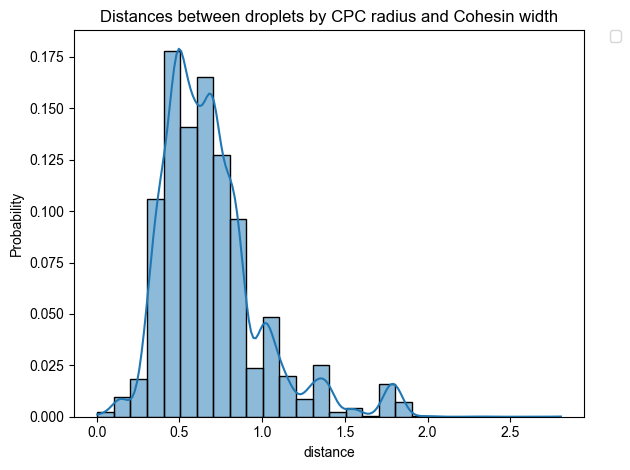

In [ ]:
long_dist_df5 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0067_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df5,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-f0e05b4d9111>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-12-fa5c2c99d7f5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-12-fa5c2c99d7f5>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


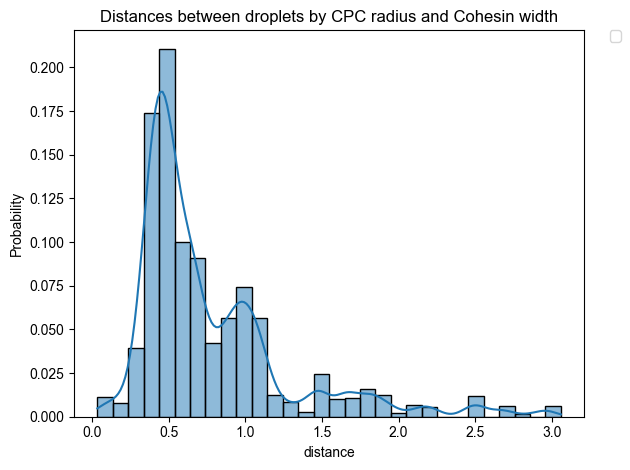

In [ ]:
long_dist_df6 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0089_noisy_cohesin_chr_lengths_MCF10A.csv",
)
sns.histplot(
    data=long_dist_df6,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

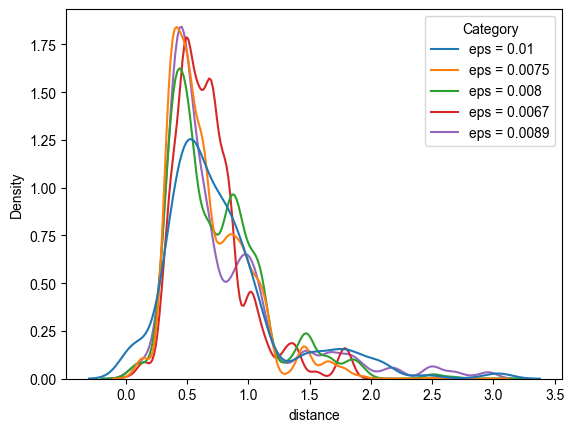

In [ ]:
outdir = f"{indir}/radii_lineplots_kymographs/domain_0_2_noisy_cohesin_sd_0.11"

binwidth = 0.05
long_dist_df["Category"] = "eps = 0.01"
long_dist_df2["Category"] = "eps = 0.0075"
long_dist_df3["Category"] = "eps = 0.005"
long_dist_df4["Category"] = "eps = 0.008"
long_dist_df5["Category"] = "eps = 0.0067"
long_dist_df6["Category"] = "eps = 0.0089"

long_dist_df = pd.concat(
    [long_dist_df, long_dist_df2,  # long_dist_df3,
        long_dist_df4, long_dist_df5, long_dist_df6], ignore_index=True
)
# sns.histplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     binwidth=binwidth,
#     stat="probability",
#     common_norm=False,
#     kde=True,
# )
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    # stat="probability",
    common_norm=False,
)
# plt.savefig(f"{outdir}/distances_between_droplets_histplot_sims_kdes_v4.png")
plt.show()

In [ ]:
# outdir = f"{indir}/radii_over_time_level_set_plots/domain_0_2_noisy_cohesin_sd_0.25/"

# long_dist_df = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distances/simulated_droplet_distances_e_0.0075_noisy_cohesin_sd_0.25.csv",
# )
# sns.histplot(
#     data=long_dist_df, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
# the below code is pulled from distances_between_droplets.py in the CPC_condensate_images folder on Box.
def inter_droplet_distance(indir, image):
    distance_dict = {}
    tmp = pd.read_csv(
        f"{indir}/count_peaks_image{image}_.csv",
        header=0,
        index_col=0,
        converters={"IC_peaks": pd.eval,
                    "left_peaks": pd.eval, "right_peaks": pd.eval},
    )
    for i, r in tmp.iterrows():
        ic = list(r["IC_peaks"])
        left = list(r["left_peaks"])
        right = list(r["right_peaks"])
        [ic.extend(l) for l in (left, right)]
        all_peaks = sorted(ic)

        distances = []
        for j in range(len(all_peaks) - 1):
            d = (all_peaks[j + 1] - all_peaks[j]) * 0.06013
            distances.append(d)
        distance_dict[i] = distances
    return distance_dict


indir2 = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis"
all_images = []
all_images_dict = {}
for image in range(10):
    distance_dict = inter_droplet_distance(indir2, image=image)
    # all_images_dict[image] = distance_dict
    all_ = []
    for k in distance_dict.keys():
        all_.extend(distance_dict[k])
    all_images_dict[f"{image}"] = all_
    all_images.extend(all_)

print(all_images_dict)

{'0': [0.48104, 0.30065000000000003, 1.2026000000000001, 0.36078, 0.42091, 0.48104, 0.36078, 0.48104, 0.6013000000000001, 0.6614300000000001, 0.78169, 0.48104, 0.42091, 0.42091, 0.54117, 0.54117, 0.42091, 0.54117, 0.36078, 0.36078, 0.54117, 0.6013000000000001, 1.02221, 1.3829900000000002, 0.48104, 0.48104, 0.42091, 0.96208, 0.54117, 0.30065000000000003, 0.54117, 0.6013000000000001, 0.36078, 0.36078, 0.30065000000000003, 0.48104, 1.02221, 0.48104, 0.42091, 0.48104, 0.30065000000000003, 0.54117, 0.36078, 0.36078, 0.54117, 0.96208, 0.90195, 0.42091, 0.48104, 0.42091, 0.54117, 1.02221, 0.54117, 0.6614300000000001, 0.6614300000000001, 1.2026000000000001, 0.6614300000000001, 0.90195, 0.42091, 0.42091, 0.42091, 0.36078, 0.6614300000000001, 0.6614300000000001, 0.24052, 0.42091, 0.78169, 0.78169, 1.2627300000000001, 0.84182, 0.30065000000000003, 0.30065000000000003, 0.72156, 0.6614300000000001, 0.24052, 0.6614300000000001, 0.84182, 0.54117, 0.48104, 0.48104, 0.72156, 0.78169, 0.6614300000000001

In [ ]:
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples.append(ast.literal_eval(line.strip()))

# make distributions
bootstrapped_df = pd.DataFrame(
    columns=["Category", "seed", "time", "cpc", "cohesin", "distance"])
# bootstrap_samples = [["0", "1", "2", "5", "7",], ["0", "1", "2", "8", "9"]]
for n, samples in enumerate(bootstrap_samples):
    print(n/len(bootstrap_samples))
    for s in samples:
        try:
            for d in all_images_dict[s]:
                bootstrapped_df = pd.concat(
                    [
                        bootstrapped_df,
                        pd.DataFrame(
                            {
                                "Category": [f"Bootstrap {n}"],
                                "seed": [0],
                                "time": [0],
                                "cpc": [0],
                                "cohesin": [0],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except KeyError:
            pass

0.0
0.01


<ipython-input-16-ba5f257472ef>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrapped_df = pd.concat(


0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


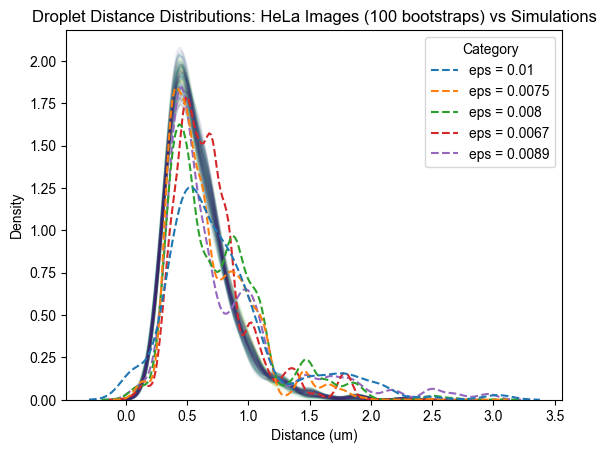

In [ ]:
fig, axes = plt.subplots()
sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=100),
    ax=axes
)
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    common_norm=False,
    # palette=sns.color_palette("Spectral", n_colors=100),
    ax=axes,
    linestyle="--",

)
plt.title(
    "Droplet Distance Distributions: HeLa Images (100 bootstraps) vs Simulations")
plt.xlabel("Distance (um)")
plt.ylabel("Density")
# plt.savefig(
# f"{outdir}/distances_between_droplets_kdeplot_HeLa_images_vs_sim_bootstrapped_v1.png")
plt.show()

In [ ]:
#########################################################
# MCF10A bootstrapping
#########################################################


indir_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/"
all_images_MCF10A = []
all_images_dict_MCF10A = {}
for image in range(1, 50):
    try:
        distance_dict = inter_droplet_distance(indir_MCF10A, image=image)
        # all_images_dict[image] = distance_dict
        all_ = []
        for k in distance_dict.keys():
            all_.extend(distance_dict[k])
        all_images_dict_MCF10A[f"{image}"] = all_
        all_images_MCF10A.extend(all_)
    except FileNotFoundError:
        print(f"File not found for image {image}.")

print(all_images_dict_MCF10A)

File not found for image 2.
File not found for image 5.
File not found for image 13.
File not found for image 20.
File not found for image 30.
File not found for image 38.
File not found for image 40.
File not found for image 45.
File not found for image 46.
File not found for image 48.
File not found for image 49.
{'1': [0.84182, 0.42091, 0.54117, 0.6614300000000001, 0.36078, 0.48104, 0.42091, 0.90195, 0.42091, 0.54117, 1.3228600000000001, 0.6614300000000001, 0.6614300000000001, 0.48104, 0.18039, 0.54117, 1.86403, 0.48104, 0.6614300000000001, 0.48104, 1.86403, 0.72156, 0.48104, 0.42091, 0.24052, 0.36078, 0.36078, 0.48104, 0.42091, 0.6614300000000001, 0.72156, 0.48104, 0.84182, 0.6614300000000001, 0.48104, 0.36078, 0.42091, 1.2627300000000001, 0.72156, 0.72156, 0.72156, 0.36078, 0.84182], '3': [1.08234, 0.42091, 0.78169, 0.6013000000000001, 0.6614300000000001, 0.36078, 0.36078, 0.30065000000000003, 0.42091, 0.48104, 0.42091, 1.3829900000000002, 1.14247, 0.42091, 1.50325], '4': [0.54117

In [ ]:
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples.append(ast.literal_eval(line.strip()))

# make distributions
bootstrapped_df_MCF10A = pd.DataFrame(
    columns=["Category", "seed", "time", "cpc", "cohesin", "distance"])
for n, samples in enumerate(bootstrap_samples):
    print(n/len(bootstrap_samples))
    for s in samples:
        # try:
        for d in all_images_dict_MCF10A[f"{s}"]:
            bootstrapped_df_MCF10A = pd.concat(
                [
                    bootstrapped_df_MCF10A,
                    pd.DataFrame(
                        {
                            "Category": [f"Bootstrap {n}"],
                            "seed": [0],
                            "time": [0],
                            "cpc": [0],
                            "cohesin": [0],
                            "distance": [d],
                        }
                    ),
                ],
                ignore_index=True,
            )
        # except KeyError:
            # pass

0.0


<ipython-input-19-fe439424dfed>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrapped_df_MCF10A = pd.concat(


0.009900990099009901
0.019801980198019802
0.0297029702970297
0.039603960396039604
0.04950495049504951
0.0594059405940594
0.06930693069306931
0.07920792079207921
0.0891089108910891
0.09900990099009901
0.10891089108910891
0.1188118811881188
0.12871287128712872
0.13861386138613863
0.1485148514851485
0.15841584158415842
0.16831683168316833
0.1782178217821782
0.18811881188118812
0.19801980198019803
0.2079207920792079
0.21782178217821782
0.22772277227722773
0.2376237623762376
0.24752475247524752
0.25742574257425743
0.26732673267326734
0.27722772277227725
0.2871287128712871
0.297029702970297
0.3069306930693069
0.31683168316831684
0.32673267326732675
0.33663366336633666
0.3465346534653465
0.3564356435643564
0.36633663366336633
0.37623762376237624
0.38613861386138615
0.39603960396039606
0.40594059405940597
0.4158415841584158
0.42574257425742573
0.43564356435643564
0.44554455445544555
0.45544554455445546
0.46534653465346537
0.4752475247524752
0.48514851485148514
0.49504950495049505
0.50495049504

<ipython-input-20-baa0375926e0>:14: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(


<Axes: xlabel='distance', ylabel='Density'>

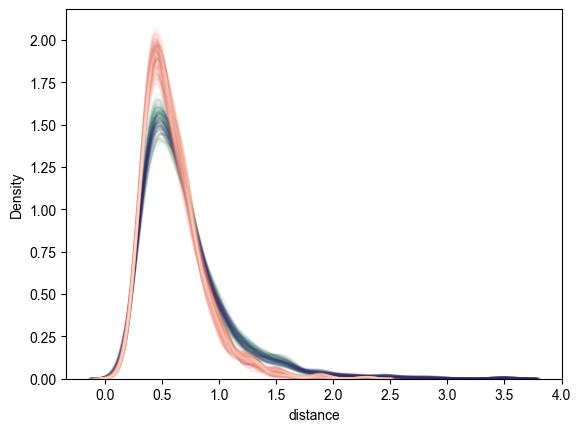

In [ ]:
fig, axes = plt.subplots(1, 1)
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
    ax=axes
)
sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
    ax=axes
)

In [ ]:
# KDE-based average distributions for HeLa and MCF10A

# df should be your DataFrame with "Category" and "distance"
categories = bootstrapped_df_MCF10A["Category"].unique()

# Common evaluation grid
all_distances = bootstrapped_df_MCF10A["distance"].values
x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

# Compute KDE for each bootstrap category
kde_vals = []

for cat in categories:
    sample = bootstrapped_df_MCF10A[bootstrapped_df_MCF10A["Category"]
                                    == cat]["distance"].values
    kde = gaussian_kde(sample)
    kde_vals.append(kde(x_eval))

kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

# Average the KDEs
avg_kde = np.mean(kde_vals, axis=0)

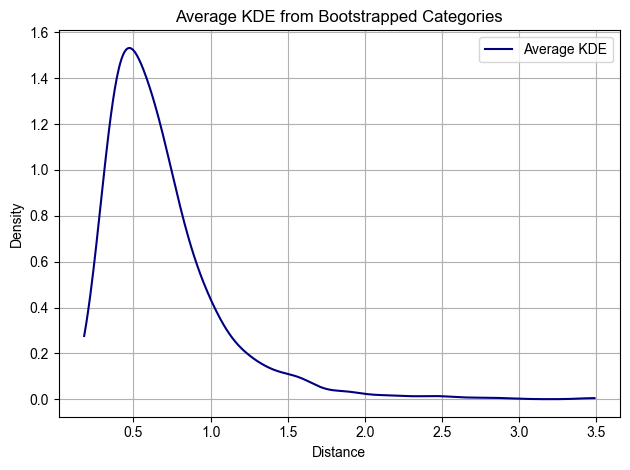

In [ ]:
# KDE-based average distributions for HeLa and MCF10A

# df should be your DataFrame with "Category" and "distance"
categories = bootstrapped_df_MCF10A["Category"].unique()

# Common evaluation grid
all_distances = bootstrapped_df_MCF10A["distance"].values
x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

# Compute KDE for each bootstrap category
kde_vals = []

for cat in categories:
    sample = bootstrapped_df_MCF10A[bootstrapped_df_MCF10A["Category"]
                                    == cat]["distance"].values
    kde = gaussian_kde(sample)
    kde_vals.append(kde(x_eval))

kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

# Average the KDEs
avg_kde = np.mean(kde_vals, axis=0)
sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

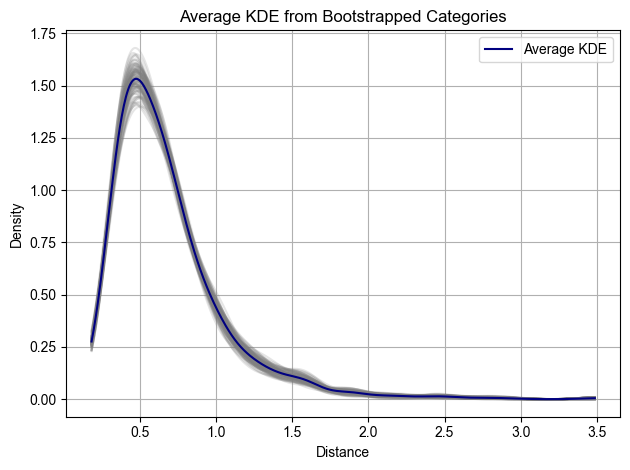

In [ ]:
# KDE-based average distributions for HeLa and MCF10A

# df should be your DataFrame with "Category" and "distance"
categories = bootstrapped_df_MCF10A["Category"].unique()

# Common evaluation grid
all_distances = bootstrapped_df_MCF10A["distance"].values
x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

# Compute KDE for each bootstrap category
kde_vals = []

for cat in categories:
    sample = bootstrapped_df_MCF10A[bootstrapped_df_MCF10A["Category"]
                                    == cat]["distance"].values
    kde = gaussian_kde(sample)
    kde_vals.append(kde(x_eval))

kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

# Average the KDEs
avg_kde = np.mean(kde_vals, axis=0)

for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

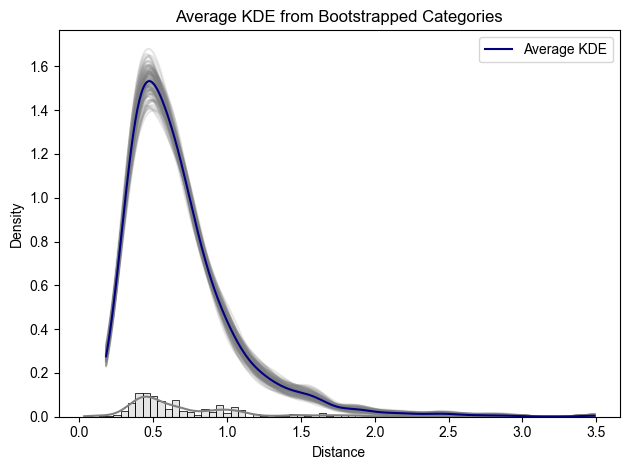

In [ ]:
# KDE-based average distributions for HeLa and MCF10A

# df should be your DataFrame with "Category" and "distance"
categories = bootstrapped_df_MCF10A["Category"].unique()

# Common evaluation grid
all_distances = bootstrapped_df_MCF10A["distance"].values
x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

# Compute KDE for each bootstrap category
kde_vals = []

for cat in categories:
    sample = bootstrapped_df_MCF10A[bootstrapped_df_MCF10A["Category"]
                                    == cat]["distance"].values
    kde = gaussian_kde(sample)
    kde_vals.append(kde(x_eval))

kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

# Average the KDEs
avg_kde = np.mean(kde_vals, axis=0)

sns.histplot(data = long_dist_df.loc[long_dist_df["Category"]=='eps = 0.0089'], x = "distance", binwidth = 0.05, stat = "probability", common_norm = False, kde = True, color = "gray", alpha = 0.2)
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

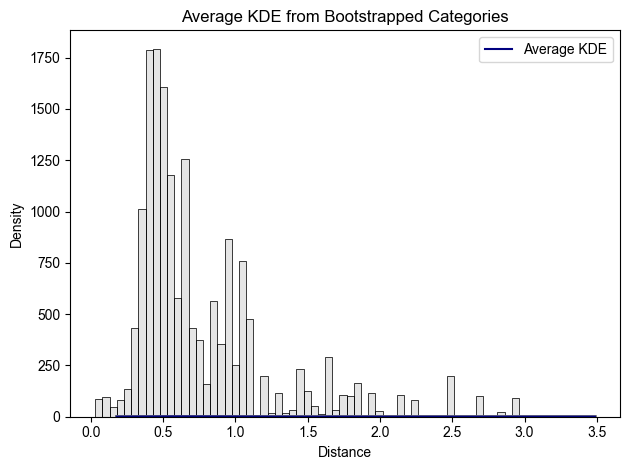

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             binwidth=0.05, common_norm=False,  color="gray", alpha=0.2)
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

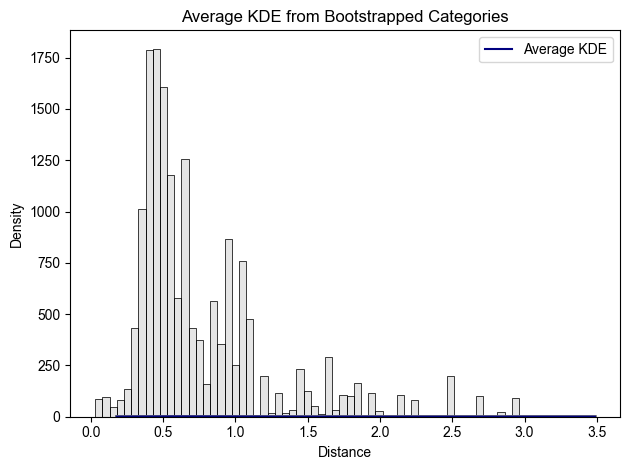

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             binwidth=0.05, common_norm=True,  color="gray", alpha=0.2)
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
t

NameError: name 't' is not defined

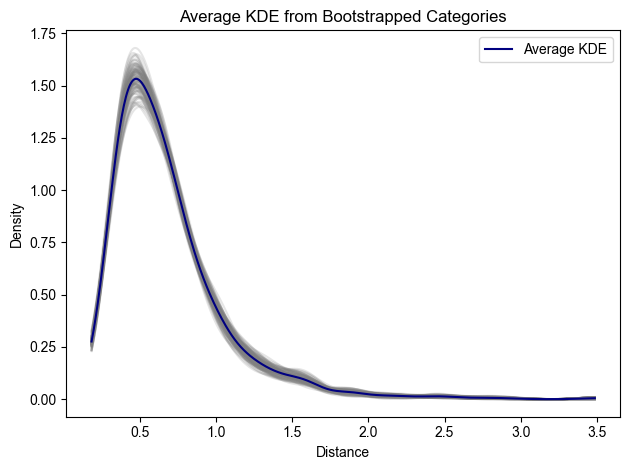

In [ ]:
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              binwidth=0.05, common_norm=True,  color="gray", alpha=0.2)
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    common_norm=False,
    # palette=sns.color_palette("Spectral", n_colors=100),
    ax=axes,
    linestyle="--",

)
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

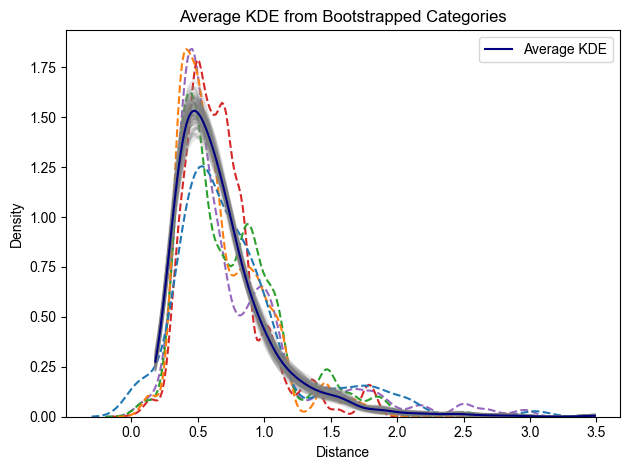

In [ ]:
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              binwidth=0.05, common_norm=True,  color="gray", alpha=0.2)
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    common_norm=False,
    # palette=sns.color_palette("Spectral", n_colors=100),
    linestyle="--",

)
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'hist'

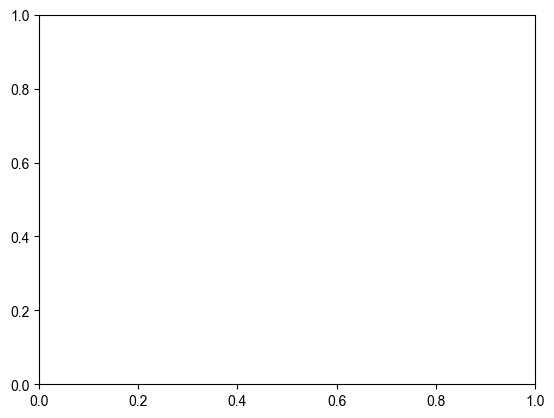

In [ ]:
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              binwidth=0.05, common_norm=True,  color="gray", alpha=0.2)
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    common_norm=False,
    hist = True,
    # palette=sns.color_palette("Spectral", n_colors=100),
    linestyle="--",

)
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

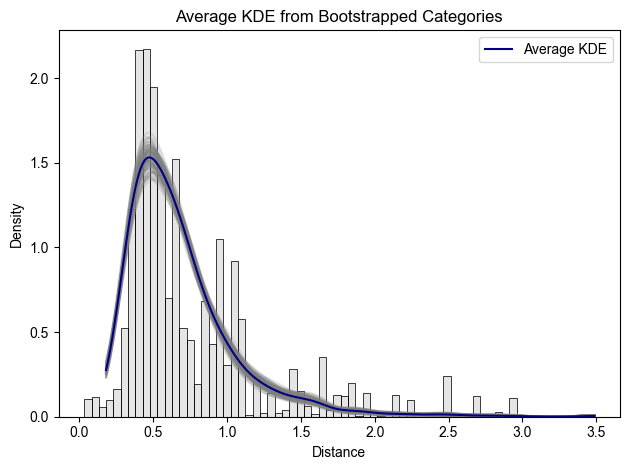

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat = 'density',binwidth=0.05, common_norm=False,  color="gray", alpha=0.2)
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

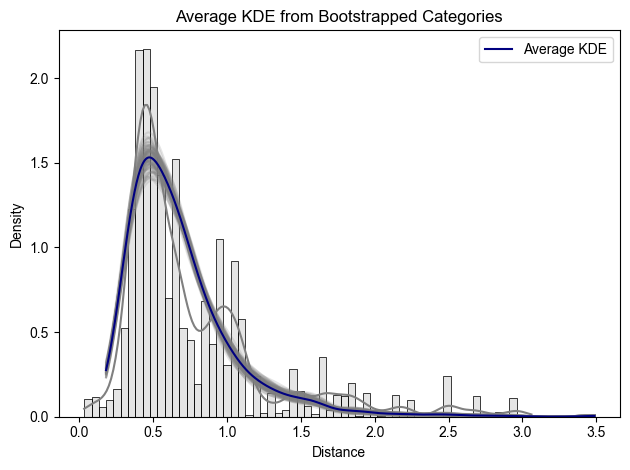

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True)
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
for y in kde_vals:
    sns.lineplot(x=x_eval, y=y, color="gray", alpha=0.2)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

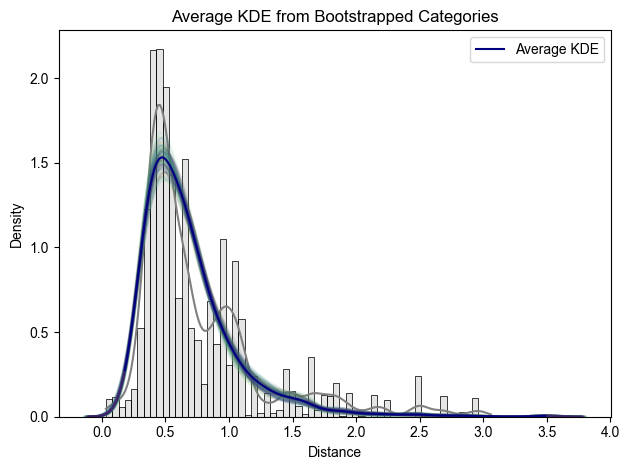

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True)
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Average KDE from Bootstrapped Categories")
plt.legend()
plt.tight_layout()
plt.show()

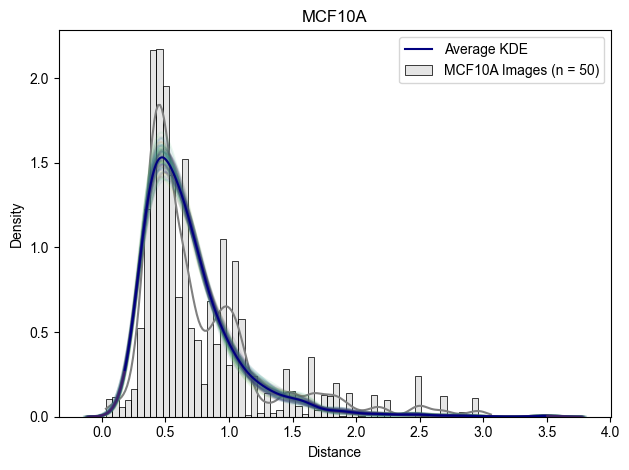

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="MCF10A Images (n = 50)")
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy", label="Average KDE")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-35-15dfdc9a47b4>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


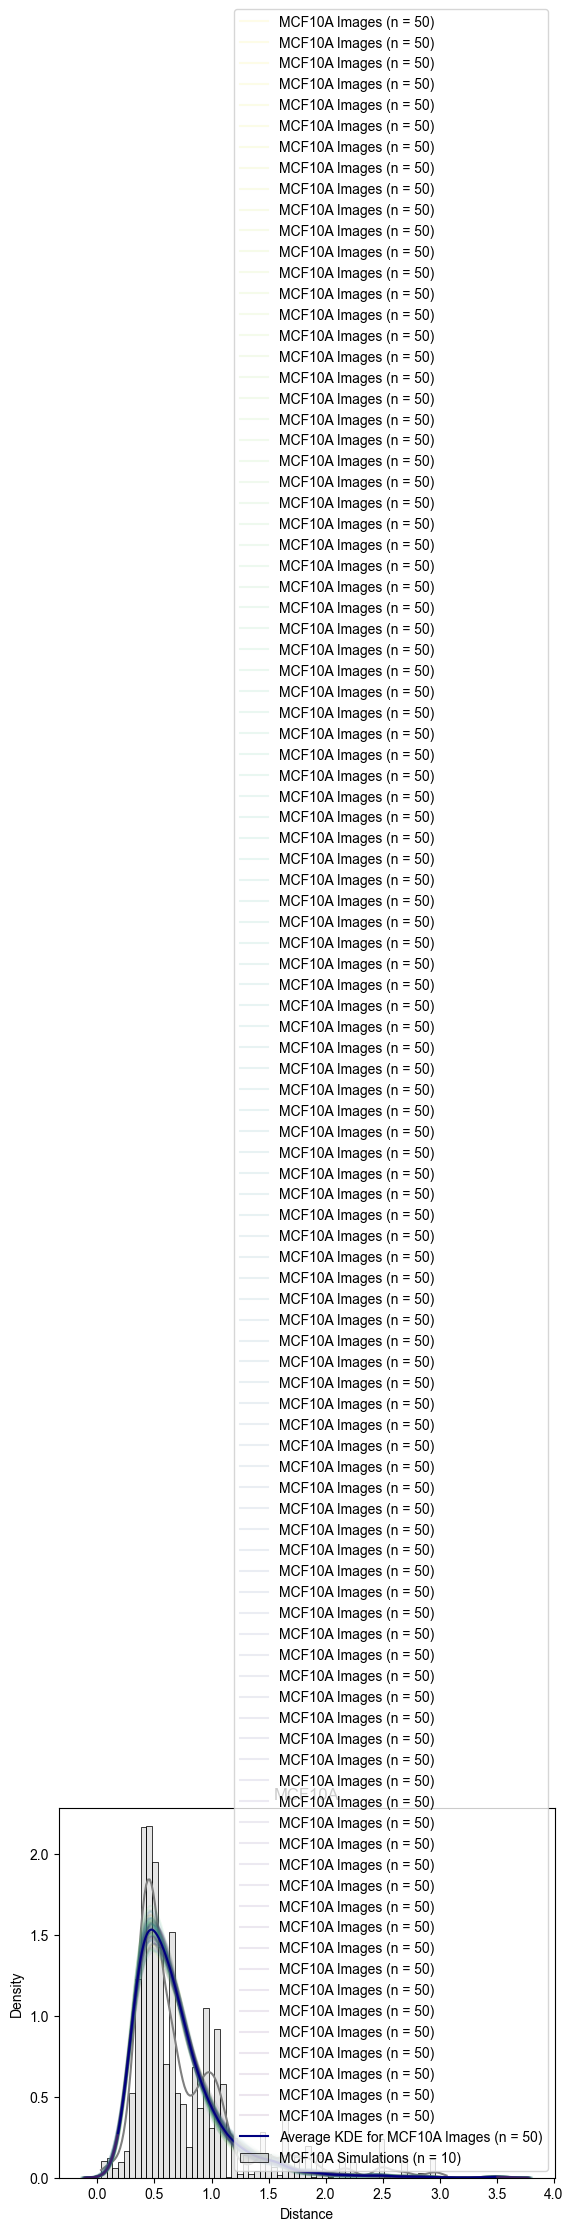

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="MCF10A Simulations (n = 10)")
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
    label = "MCF10A Images (n = 50)",
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A")
plt.legend()
plt.tight_layout()
plt.show()

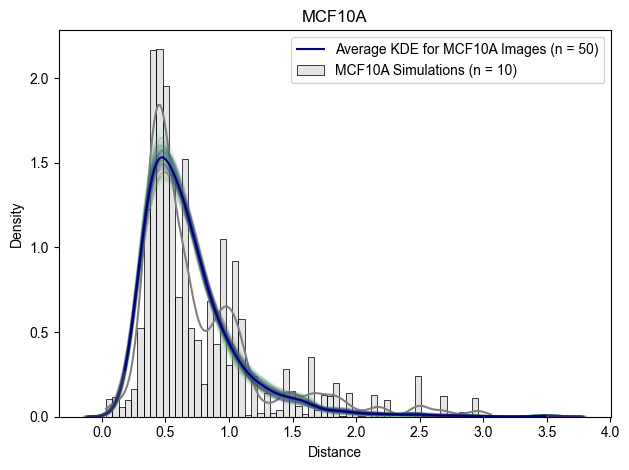

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="MCF10A Simulations (n = 10)")
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# PLOTTING EXPERIMENT VS SIMULATION FIGURE 6
# KDE-based average distributions for HeLa and MCF10A


def compute_kde(bootstrapped_df):
    # df should be your DataFrame with "Category" and "distance"
    categories = bootstrapped_df["Category"].unique()

    # Common evaluation grid
    all_distances = bootstrapped_df["distance"].values
    x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

    # Compute KDE for each bootstrap category
    kde_vals = []

    for cat in categories:
        sample = bootstrapped_df[bootstrapped_df["Category"]
                                 == cat]["distance"].values
        kde = gaussian_kde(sample)
        kde_vals.append(kde(x_eval))

    kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

    # Average the KDEs
    avg_kde = np.mean(kde_vals, axis=0)
    return avg_kde

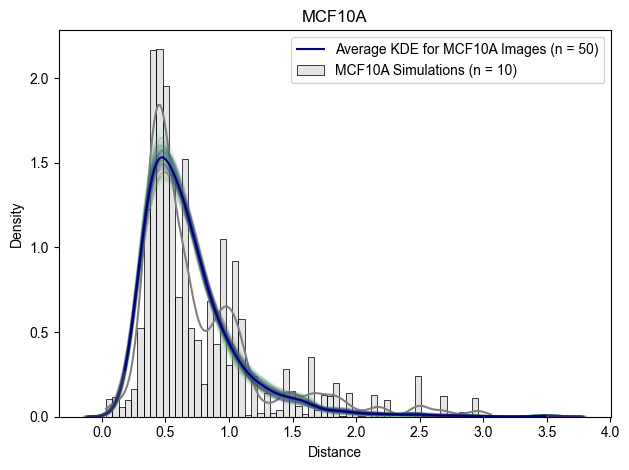

In [ ]:
ave_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="MCF10A Simulations (n = 10)")
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A")
plt.legend()
plt.tight_layout()
# plt.show()

In [ ]:
# PLOTTING EXPERIMENT VS SIMULATION FIGURE 6
# KDE-based average distributions for HeLa and MCF10A


def compute_kde(bootstrapped_df):
    # df should be your DataFrame with "Category" and "distance"
    categories = bootstrapped_df["Category"].unique()

    # Common evaluation grid
    all_distances = bootstrapped_df["distance"].values
    x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

    # Compute KDE for each bootstrap category
    kde_vals = []

    for cat in categories:
        sample = bootstrapped_df[bootstrapped_df["Category"]
                                 == cat]["distance"].values
        kde = gaussian_kde(sample)
        kde_vals.append(kde(x_eval))

    kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

    # Average the KDEs
    avg_kde = np.mean(kde_vals, axis=0)
    return x_eval, avg_kde

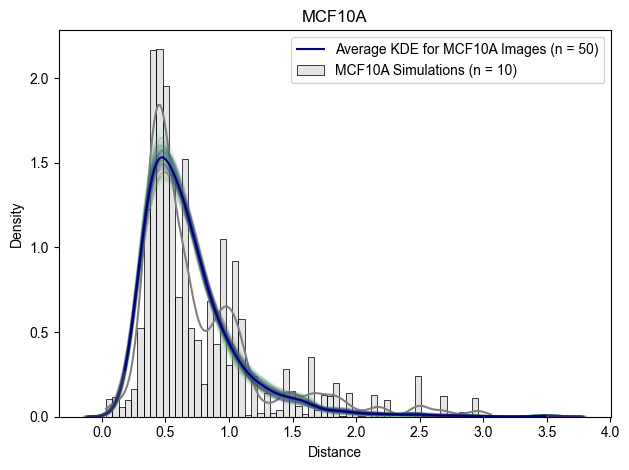

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="MCF10A Simulations (n = 10)")
# sns.kdeplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     common_norm=False,
#     hist = True,
#     # palette=sns.color_palette("Spectral", n_colors=100),
#     linestyle="--",

# )
sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A")
plt.legend()
plt.tight_layout()
# plt.show()

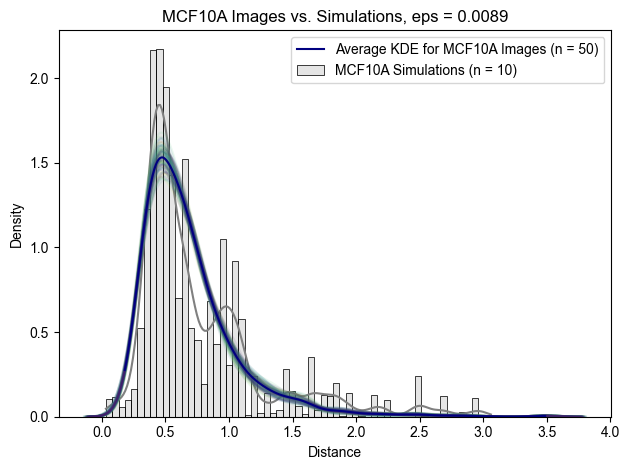

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="MCF10A Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
plt.legend()
plt.tight_layout()
# plt.show()

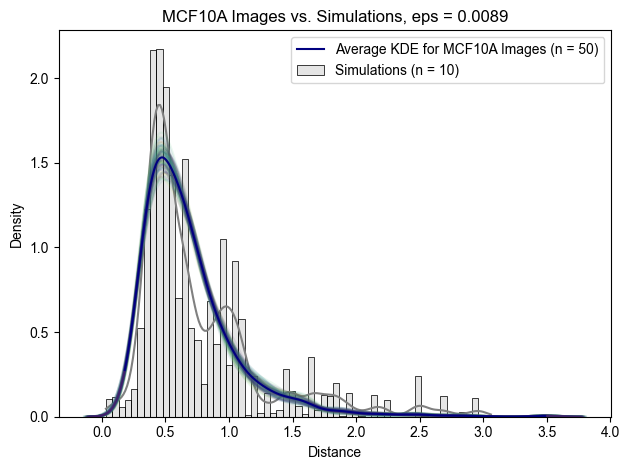

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
plt.legend()
plt.tight_layout()
# plt.show()

<ipython-input-43-73224eca04a2>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(


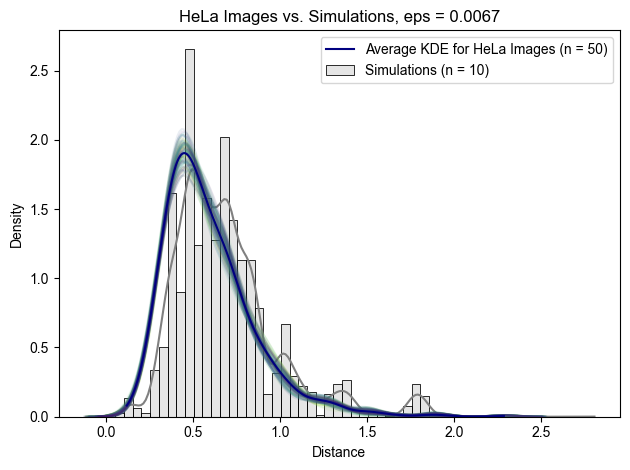

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 50)")

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")
plt.legend()
plt.tight_layout()
# plt.show()

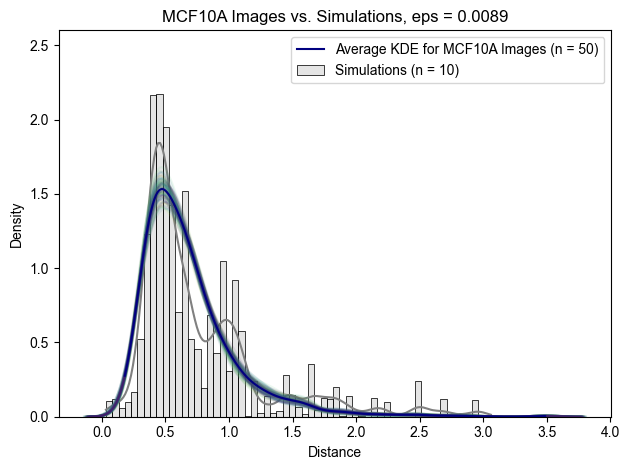

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0,2.6)
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-45-f0a0580be9e0>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(


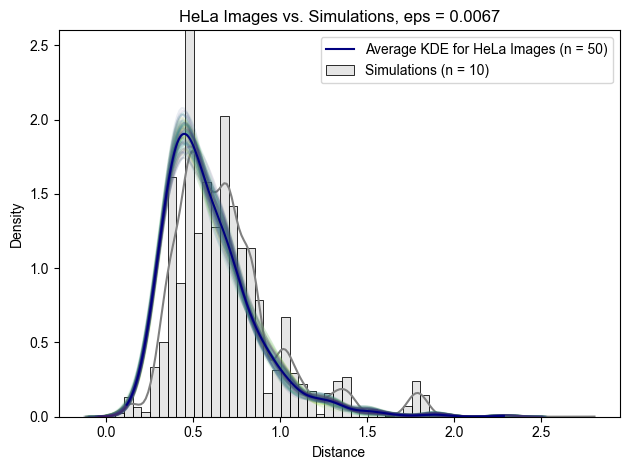

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 50)")
plt.ylim(0,2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-46-58c123fa358d>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(


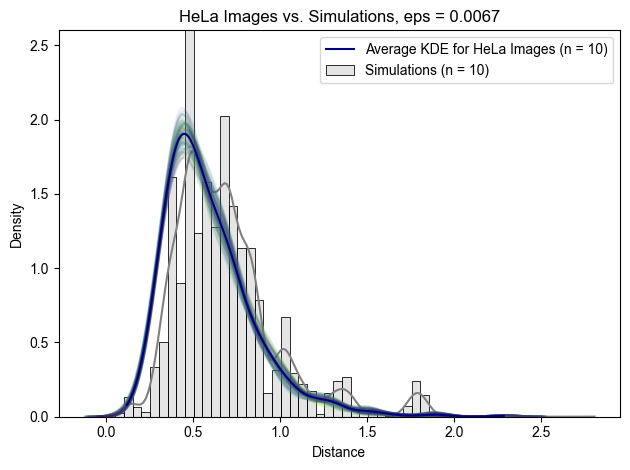

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-47-2c8dcd32fa65>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(


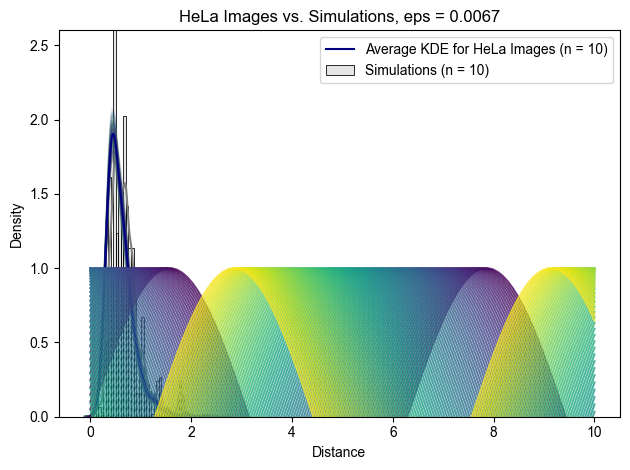

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")
from matplotlib.lines import Line2D

x = np.linspace(0, 10, 100)
palette = sns.color_palette("viridis", n_colors=101)

for i, color in enumerate(palette):
    y = np.sin(x + i * 0.05)
    plt.plot(x, y, color=color, alpha=0.8)

# Create a custom legend entry — a single multi-color line isn't directly possible,
# but we can simulate with a representative line
# Use a neutral or base color
custom_line = Line2D([0], [0], color="gray", linestyle="-")

plt.legend([custom_line], ["Bootstrapped Lines"], loc="upper right")

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-48-aaa1aef5085b>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(


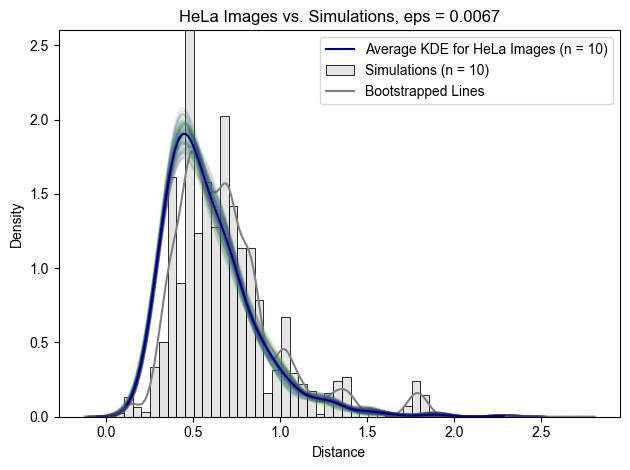

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

x = np.linspace(0, 10, 100)
palette = sns.color_palette("viridis", n_colors=101)

# for i, color in enumerate(palette):
#     y = np.sin(x + i * 0.05)
#     plt.plot(x, y, color=color, alpha=0.8)

# Create a custom legend entry — a single multi-color line isn't directly possible,
# but we can simulate with a representative line
# Use a neutral or base color
custom_line = Line2D([0], [0], color="gray", linestyle="-")

handles, labels = plt.gca().get_legend_handles_labels()

# Append your custom one
handles.append(custom_line)
labels.append("Bootstrapped Lines")

# Redraw the combined legend
plt.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()

<ipython-input-49-8ca5fd91f185>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-49-8ca5fd91f185>:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  handler_map={fake_handle: HandlerColormap(cm.get_cmap("viridis"))},


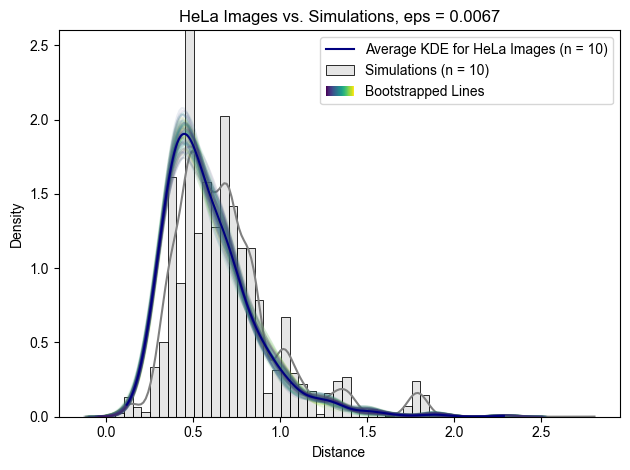

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

x = np.linspace(0, 10, 100)
palette = sns.color_palette("viridis", n_colors=101)

# for i, color in enumerate(palette):
#     y = np.sin(x + i * 0.05)
#     plt.plot(x, y, color=color, alpha=0.8)

# Create a custom legend entry — a single multi-color line isn't directly possible,
# but we can simulate with a representative line
# Use a neutral or base color
custom_line = Line2D([0], [0], color="gray", linestyle="-")
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
from matplotlib import cm
class HandlerColormap(HandlerBase):
    def __init__(self, cmap, n_segments=100, **kw):
        self.cmap = cmap
        self.n_segments = n_segments
        HandlerBase.__init__(self, **kw)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            color = self.cmap(i / self.n_segments)
            x = x0 + width * i / self.n_segments
            rect = Rectangle((x, y0), width / self.n_segments, height, facecolor=color, transform=trans)
            segments.append(rect)
        return segments

# Use this to create a fake handle
fake_handle = Rectangle((0, 0), 1, 1)  # Dummy patch
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, fake_handle],
    labels=[*labels, "Bootstrapped Lines"],
    handler_map={fake_handle: HandlerColormap(cm.get_cmap("viridis"))},
    loc='upper right'
)

plt.tight_layout()
plt.show()

<ipython-input-50-f932ec73f31c>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-50-f932ec73f31c>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"))},


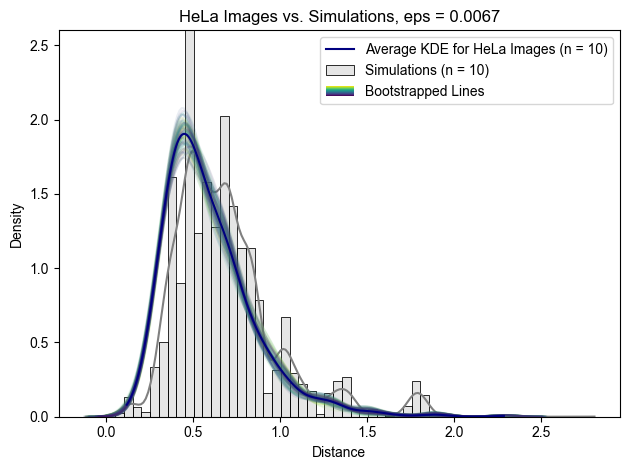

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        # We make horizontal segments, changing vertically (i.e., along height)
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rect = Rectangle(
                (x0, y),
                width,                  # full width
                height / self.n_segments,
                facecolor=self.cmap(i / self.n_segments),
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments


# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Lines"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"))},
    loc='upper right'
)

plt.tight_layout()
plt.show()

<ipython-input-51-9adc80aeea60>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-51-9adc80aeea60>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"),alpha = 0.2)},


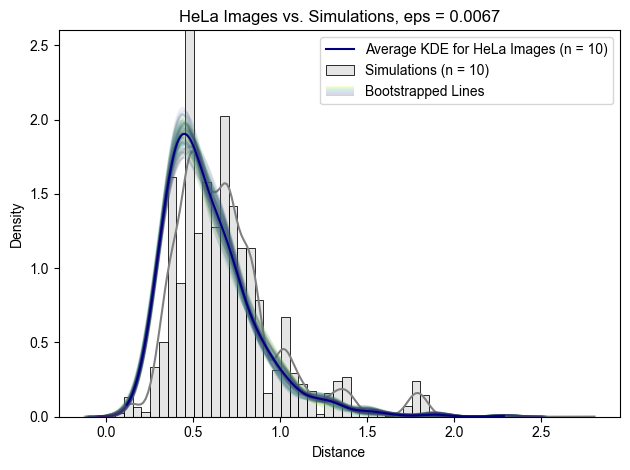

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments


# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Lines"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"),alpha = 0.2)},
    loc='upper right'
)

plt.tight_layout()
plt.show()

<ipython-input-52-1df54876f2b2>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-52-1df54876f2b2>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


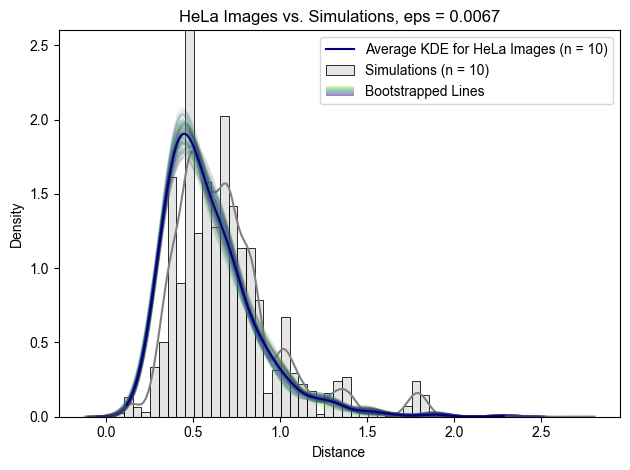

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments


# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Lines"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()

<ipython-input-53-bae53fb475e0>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-53-bae53fb475e0>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


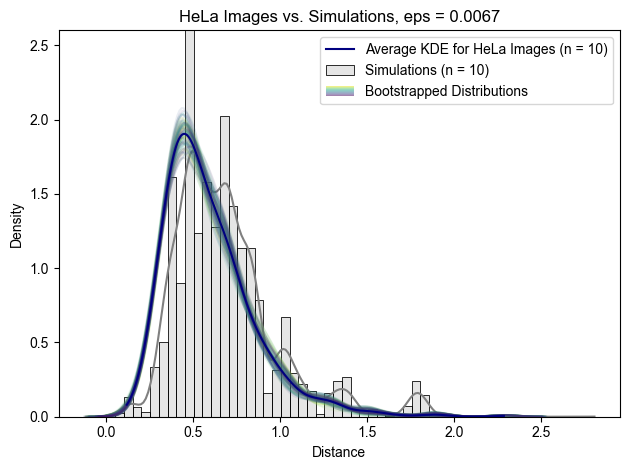

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments


# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()

In [ ]:
# PLOTTING EXPERIMENT VS SIMULATION FIGURE 6
# KDE-based average distributions for HeLa and MCF10A


def compute_kde(bootstrapped_df):
    # df should be your DataFrame with "Category" and "distance"
    categories = bootstrapped_df["Category"].unique()

    # Common evaluation grid
    all_distances = bootstrapped_df["distance"].values
    x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

    # Compute KDE for each bootstrap category
    kde_vals = []

    for cat in categories:
        sample = bootstrapped_df[bootstrapped_df["Category"]
                                 == cat]["distance"].values
        kde = gaussian_kde(sample)
        kde_vals.append(kde(x_eval))

    kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

    # Average the KDEs
    avg_kde = np.mean(kde_vals, axis=0)
    return x_eval, avg_kde


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments

<ipython-input-55-e204f73d6a7b>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


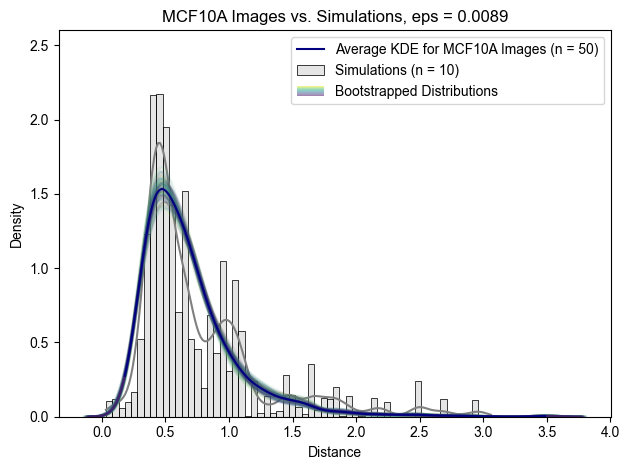

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0, 2.6)
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()

<ipython-input-56-a4959fd8fe2d>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-56-a4959fd8fe2d>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


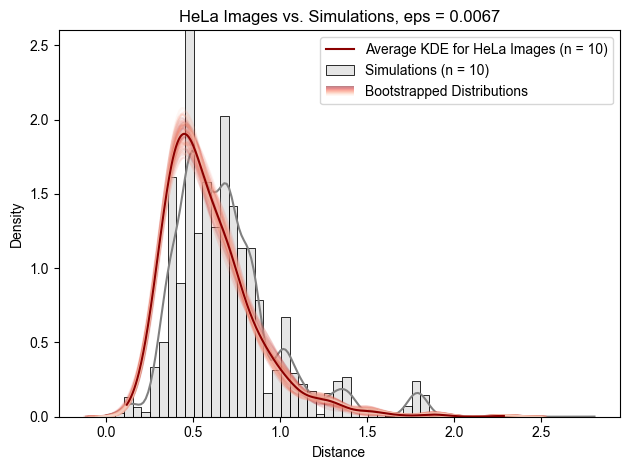

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()

In [ ]:
indir = "/Users/smgroves/Documents/GitHub/Cahn_Hilliard_Model/plotting"
outdir = (
    f"{indir}/distance_between_droplets/"
)


def make_long_dist_df(indir, file):
    # dist = pd.read_csv(f"{indir}/distance_between_droplets.csv",converters={'distances': pd.eval})
    dist = pd.read_csv(f"{indir}/{file}", header=0)
    long_dist_df = pd.DataFrame(
        # columns=["seed", "cpc", 'cohesin', 'time', 'distance'])
        columns=["cpc", "cohesin", "distance"]
    )

    for i, r in dist.iterrows():
        dist_list = str(r["distances"])[1:-2].split(" ")
        try:
            dist_list = [float(d) for d in dist_list]
            for d in dist_list:
                long_dist_df = pd.concat(
                    [
                        long_dist_df,
                        pd.DataFrame(
                            {
                                # "seed": [r["seed"]],
                                # "time": [r["time"]],
                                "cpc": [r["cpc"]],
                                "cohesin": [r["cohesin"]],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except ValueError:
            pass
    return long_dist_df

<ipython-input-58-e3d8cd105f01>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-58-e3d8cd105f01>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


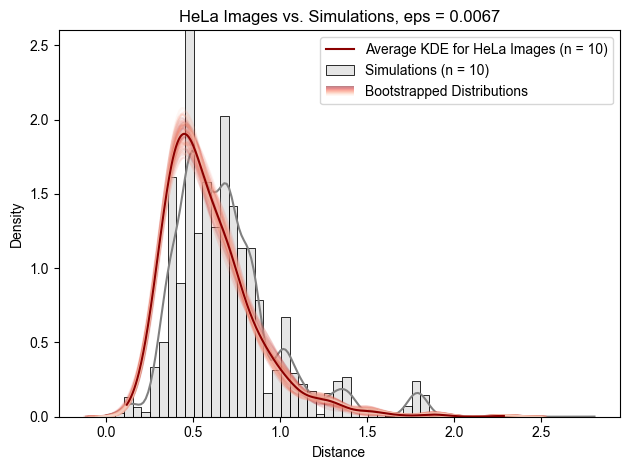

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(
    ""f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.png")

<ipython-input-59-bae8d684476f>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


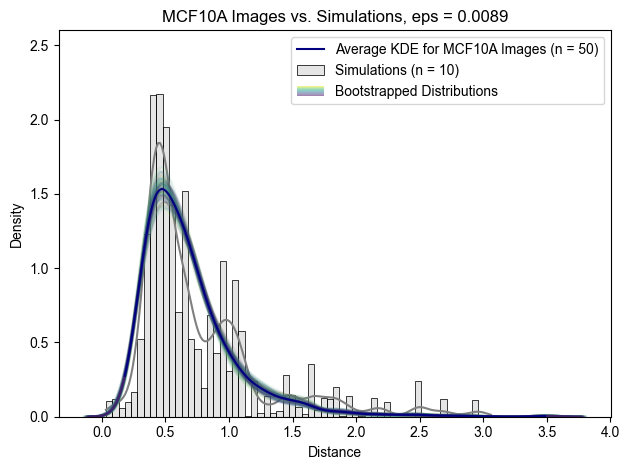

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0, 2.6)
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.png")

<ipython-input-60-40f24cd018f7>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' 

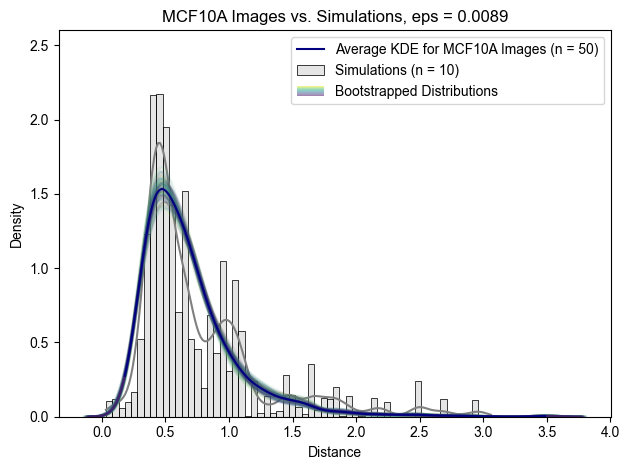

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0, 2.6)
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-61-b897d673f6cd>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-61-b897d673f6cd>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ar

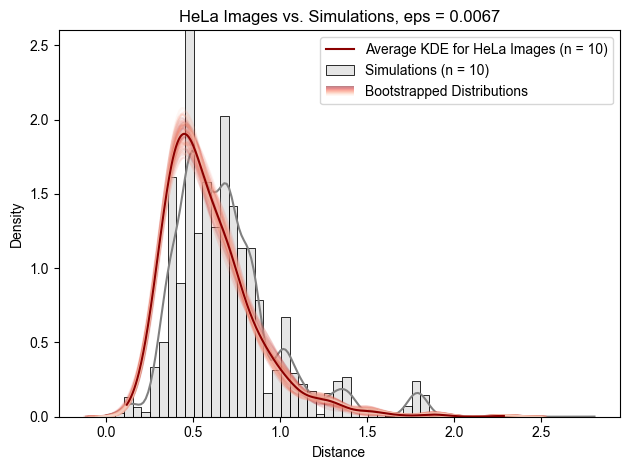

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.6)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

<ipython-input-62-120bede6723e>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfo

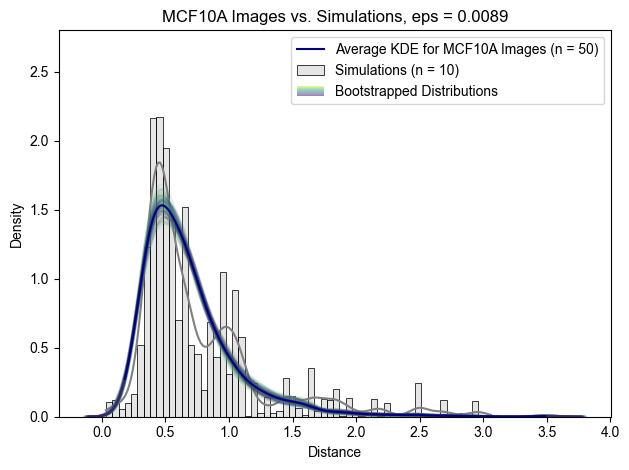

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0, 2.8)
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-63-01b5586e6cf3>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-63-01b5586e6cf3>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ar

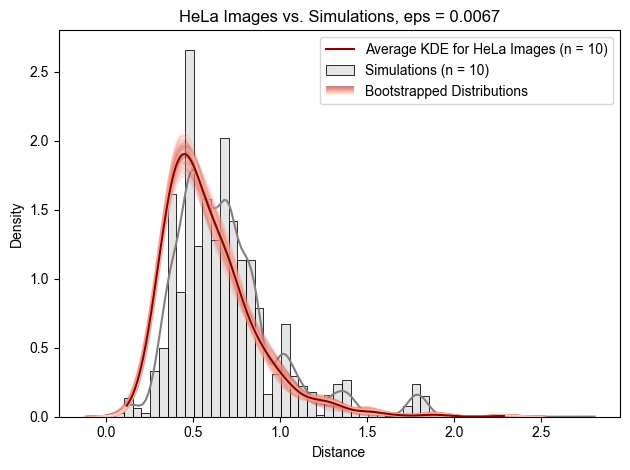

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.8)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

<ipython-input-64-d31a37884ae0>:7: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-64-d31a37884ae0>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ar

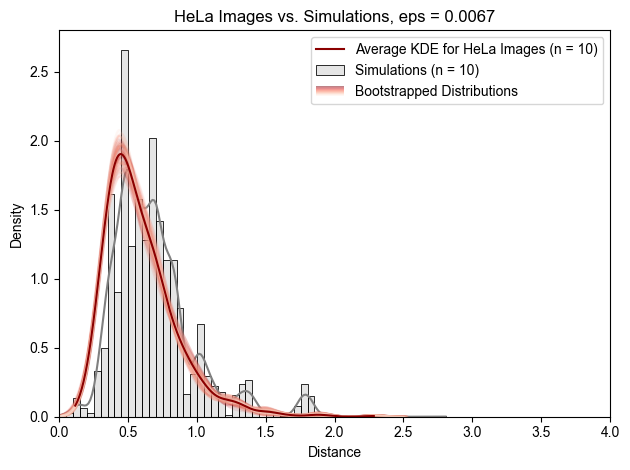

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 10)")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

<ipython-input-65-07bf451fdda7>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfo

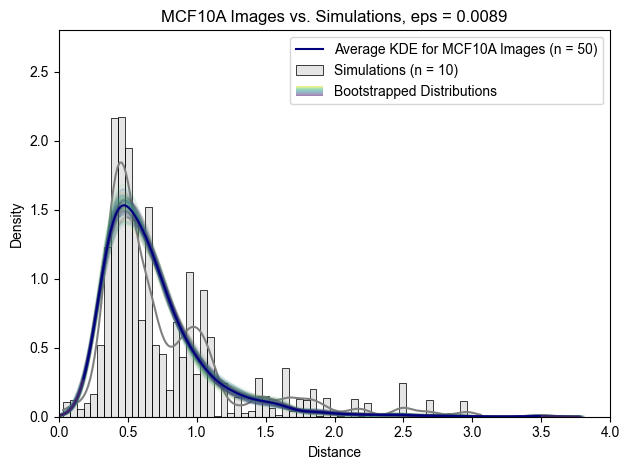

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

Connected to CHsolvers (Python 3.9.20)

In [ ]:
from matplotlib import cm
from matplotlib.legend_handler import HandlerBase
from matplotlib.patches import Rectangle
from scipy.stats import gaussian_kde
import ast
from itertools import combinations
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
indir = "/Users/smgroves/Documents/GitHub/Cahn_Hilliard_Model/plotting"
outdir = (
    f"{indir}/distance_between_droplets/"
)


def make_long_dist_df(indir, file):
    # dist = pd.read_csv(f"{indir}/distance_between_droplets.csv",converters={'distances': pd.eval})
    dist = pd.read_csv(f"{indir}/{file}", header=0)
    long_dist_df = pd.DataFrame(
        # columns=["seed", "cpc", 'cohesin', 'time', 'distance'])
        columns=["cpc", "cohesin", "distance"]
    )

    for i, r in dist.iterrows():
        dist_list = str(r["distances"])[1:-2].split(" ")
        try:
            dist_list = [float(d) for d in dist_list]
            for d in dist_list:
                long_dist_df = pd.concat(
                    [
                        long_dist_df,
                        pd.DataFrame(
                            {
                                # "seed": [r["seed"]],
                                # "time": [r["time"]],
                                "cpc": [r["cpc"]],
                                "cohesin": [r["cohesin"]],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except ValueError:
            pass
    return long_dist_df

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-3-cf4bf3782fa0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-3-cf4bf3782fa0>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


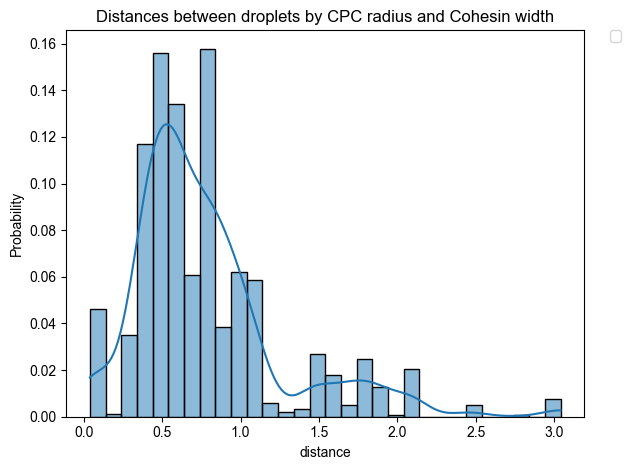

In [ ]:
long_dist_df = make_long_dist_df(
    indir,
    "simulated_droplet_distributions/simulated_droplet_distances_e_0.01_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}distances_between_droplets_swarmplot_0.0075.png")

In [ ]:
# long_dist_df = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_domain_0_2_chr_lengths.csv",
# )
# sns.histplot(
#     data=long_dist_df, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
# outdir = f"{indir}/radii_lineplots_kymographs/domain_0_1_eps_0.0075/"

# long_dist_df2 = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_domain_0_1_chr_lengths.csv",
# )
# sns.histplot(
#     data=long_dist_df2, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
long_dist_df2 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_noisy_cohesin_sd_0.11.csv",
)

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(


<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-7-e65656cc6fef>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-7-e65656cc6fef>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


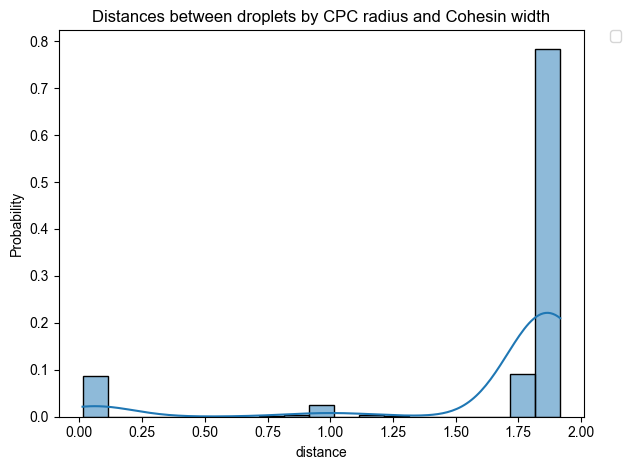

In [ ]:
long_dist_df3 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.005_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df3,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-8-5deb2d1a27cb>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-8-5deb2d1a27cb>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


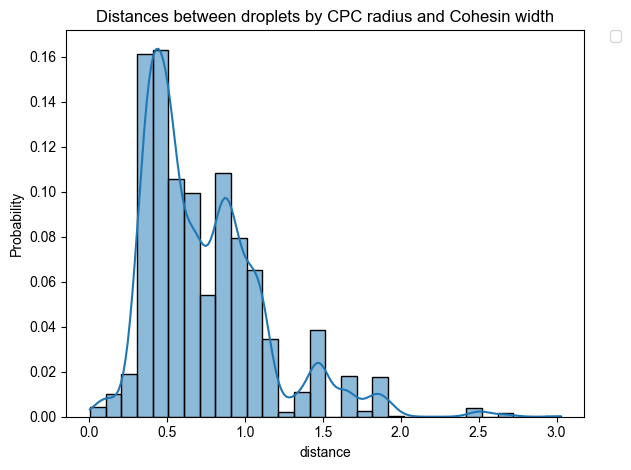

In [ ]:
long_dist_df4 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.008_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df4,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-9-046a7862cc35>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-9-046a7862cc35>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


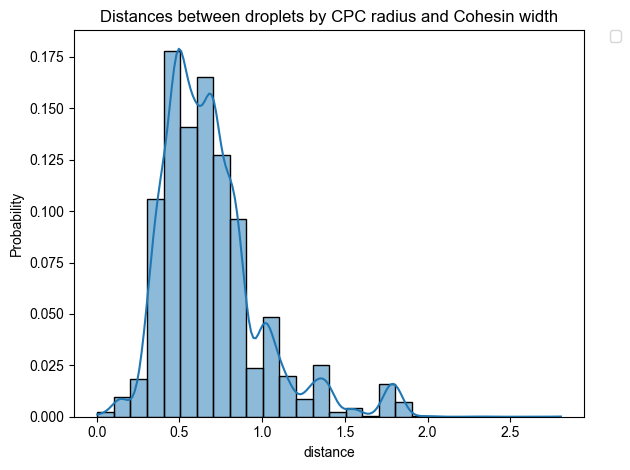

In [ ]:
long_dist_df5 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0067_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df5,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-10-fa5c2c99d7f5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-10-fa5c2c99d7f5>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


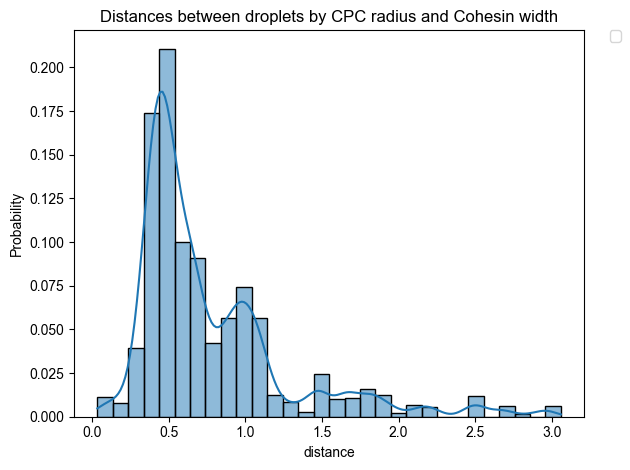

In [ ]:
long_dist_df6 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0089_noisy_cohesin_chr_lengths_MCF10A.csv",
)
sns.histplot(
    data=long_dist_df6,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

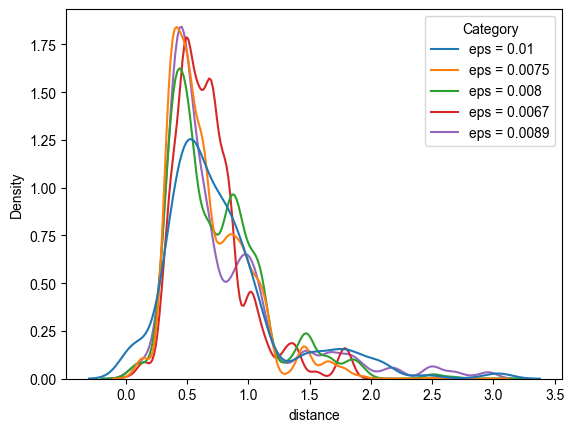

In [ ]:
outdir = f"{indir}/radii_lineplots_kymographs/domain_0_2_noisy_cohesin_sd_0.11"

binwidth = 0.05
long_dist_df["Category"] = "eps = 0.01"
long_dist_df2["Category"] = "eps = 0.0075"
long_dist_df3["Category"] = "eps = 0.005"
long_dist_df4["Category"] = "eps = 0.008"
long_dist_df5["Category"] = "eps = 0.0067"
long_dist_df6["Category"] = "eps = 0.0089"

long_dist_df = pd.concat(
    [long_dist_df, long_dist_df2,  # long_dist_df3,
        long_dist_df4, long_dist_df5, long_dist_df6], ignore_index=True
)
# sns.histplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     binwidth=binwidth,
#     stat="probability",
#     common_norm=False,
#     kde=True,
# )
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    # stat="probability",
    common_norm=False,
)
# plt.savefig(f"{outdir}/distances_between_droplets_histplot_sims_kdes_v4.png")
plt.show()

In [ ]:
# the below code is pulled from distances_between_droplets.py in the CPC_condensate_images folder on Box.
def inter_droplet_distance(indir, image):
    distance_dict = {}
    tmp = pd.read_csv(
        f"{indir}/count_peaks_image{image}_.csv",
        header=0,
        index_col=0,
        converters={"IC_peaks": pd.eval,
                    "left_peaks": pd.eval, "right_peaks": pd.eval},
    )
    for i, r in tmp.iterrows():
        ic = list(r["IC_peaks"])
        left = list(r["left_peaks"])
        right = list(r["right_peaks"])
        [ic.extend(l) for l in (left, right)]
        all_peaks = sorted(ic)

        distances = []
        for j in range(len(all_peaks) - 1):
            d = (all_peaks[j + 1] - all_peaks[j]) * 0.06013
            distances.append(d)
        distance_dict[i] = distances
    return distance_dict


indir2 = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis"
all_images = []
all_images_dict = {}
for image in range(10):
    distance_dict = inter_droplet_distance(indir2, image=image)
    # all_images_dict[image] = distance_dict
    all_ = []
    for k in distance_dict.keys():
        all_.extend(distance_dict[k])
    all_images_dict[f"{image}"] = all_
    all_images.extend(all_)

print(all_images_dict)

{'0': [0.48104, 0.30065000000000003, 1.2026000000000001, 0.36078, 0.42091, 0.48104, 0.36078, 0.48104, 0.6013000000000001, 0.6614300000000001, 0.78169, 0.48104, 0.42091, 0.42091, 0.54117, 0.54117, 0.42091, 0.54117, 0.36078, 0.36078, 0.54117, 0.6013000000000001, 1.02221, 1.3829900000000002, 0.48104, 0.48104, 0.42091, 0.96208, 0.54117, 0.30065000000000003, 0.54117, 0.6013000000000001, 0.36078, 0.36078, 0.30065000000000003, 0.48104, 1.02221, 0.48104, 0.42091, 0.48104, 0.30065000000000003, 0.54117, 0.36078, 0.36078, 0.54117, 0.96208, 0.90195, 0.42091, 0.48104, 0.42091, 0.54117, 1.02221, 0.54117, 0.6614300000000001, 0.6614300000000001, 1.2026000000000001, 0.6614300000000001, 0.90195, 0.42091, 0.42091, 0.42091, 0.36078, 0.6614300000000001, 0.6614300000000001, 0.24052, 0.42091, 0.78169, 0.78169, 1.2627300000000001, 0.84182, 0.30065000000000003, 0.30065000000000003, 0.72156, 0.6614300000000001, 0.24052, 0.6614300000000001, 0.84182, 0.54117, 0.48104, 0.48104, 0.72156, 0.78169, 0.6614300000000001

In [ ]:
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples.append(ast.literal_eval(line.strip()))

# make distributions
bootstrapped_df = pd.DataFrame(
    columns=["Category", "seed", "time", "cpc", "cohesin", "distance"])
for n, samples in enumerate(bootstrap_samples):
    print(n/len(bootstrap_samples))
    for s in samples:
        try:
            for d in all_images_dict[s]:
                bootstrapped_df = pd.concat(
                    [
                        bootstrapped_df,
                        pd.DataFrame(
                            {
                                "Category": [f"Bootstrap {n}"],
                                "seed": [0],
                                "time": [0],
                                "cpc": [0],
                                "cohesin": [0],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except KeyError:
            pass

0.0


<ipython-input-13-04faf88f084c>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrapped_df = pd.concat(


0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [ ]:
#########################################################
# MCF10A bootstrapping
#########################################################


indir_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/"
all_images_MCF10A = []
all_images_dict_MCF10A = {}
for image in range(1, 50):
    try:
        distance_dict = inter_droplet_distance(indir_MCF10A, image=image)
        # all_images_dict[image] = distance_dict
        all_ = []
        for k in distance_dict.keys():
            all_.extend(distance_dict[k])
        all_images_dict_MCF10A[f"{image}"] = all_
        all_images_MCF10A.extend(all_)
    except FileNotFoundError:
        print(f"File not found for image {image}.")

print(all_images_dict_MCF10A)

File not found for image 2.
File not found for image 5.
File not found for image 13.
File not found for image 20.
File not found for image 30.
File not found for image 38.
File not found for image 40.
File not found for image 45.
File not found for image 46.
File not found for image 48.
File not found for image 49.
{'1': [0.84182, 0.42091, 0.54117, 0.6614300000000001, 0.36078, 0.48104, 0.42091, 0.90195, 0.42091, 0.54117, 1.3228600000000001, 0.6614300000000001, 0.6614300000000001, 0.48104, 0.18039, 0.54117, 1.86403, 0.48104, 0.6614300000000001, 0.48104, 1.86403, 0.72156, 0.48104, 0.42091, 0.24052, 0.36078, 0.36078, 0.48104, 0.42091, 0.6614300000000001, 0.72156, 0.48104, 0.84182, 0.6614300000000001, 0.48104, 0.36078, 0.42091, 1.2627300000000001, 0.72156, 0.72156, 0.72156, 0.36078, 0.84182], '3': [1.08234, 0.42091, 0.78169, 0.6013000000000001, 0.6614300000000001, 0.36078, 0.36078, 0.30065000000000003, 0.42091, 0.48104, 0.42091, 1.3829900000000002, 1.14247, 0.42091, 1.50325], '4': [0.54117

In [ ]:
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples.append(ast.literal_eval(line.strip()))

# make distributions
bootstrapped_df_MCF10A = pd.DataFrame(
    columns=["Category", "seed", "time", "cpc", "cohesin", "distance"])
for n, samples in enumerate(bootstrap_samples):
    print(n/len(bootstrap_samples))
    for s in samples:
        # try:
        for d in all_images_dict_MCF10A[f"{s}"]:
            bootstrapped_df_MCF10A = pd.concat(
                [
                    bootstrapped_df_MCF10A,
                    pd.DataFrame(
                        {
                            "Category": [f"Bootstrap {n}"],
                            "seed": [0],
                            "time": [0],
                            "cpc": [0],
                            "cohesin": [0],
                            "distance": [d],
                        }
                    ),
                ],
                ignore_index=True,
            )
        # except KeyError:
            # pass

0.0


<ipython-input-15-fe439424dfed>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrapped_df_MCF10A = pd.concat(


0.009900990099009901
0.019801980198019802
0.0297029702970297
0.039603960396039604
0.04950495049504951
0.0594059405940594
0.06930693069306931
0.07920792079207921
0.0891089108910891
0.09900990099009901
0.10891089108910891
0.1188118811881188
0.12871287128712872
0.13861386138613863
0.1485148514851485
0.15841584158415842
0.16831683168316833
0.1782178217821782
0.18811881188118812
0.19801980198019803
0.2079207920792079
0.21782178217821782
0.22772277227722773
0.2376237623762376
0.24752475247524752
0.25742574257425743
0.26732673267326734
0.27722772277227725
0.2871287128712871
0.297029702970297
0.3069306930693069
0.31683168316831684
0.32673267326732675
0.33663366336633666
0.3465346534653465
0.3564356435643564
0.36633663366336633
0.37623762376237624
0.38613861386138615
0.39603960396039606
0.40594059405940597
0.4158415841584158
0.42574257425742573
0.43564356435643564
0.44554455445544555
0.45544554455445546
0.46534653465346537
0.4752475247524752
0.48514851485148514
0.49504950495049505
0.50495049504

In [ ]:
# PLOTTING EXPERIMENT VS SIMULATION FIGURE 6
# KDE-based average distributions for HeLa and MCF10A


def compute_kde(bootstrapped_df):
    # df should be your DataFrame with "Category" and "distance"
    categories = bootstrapped_df["Category"].unique()

    # Common evaluation grid
    all_distances = bootstrapped_df["distance"].values
    x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

    # Compute KDE for each bootstrap category
    kde_vals = []

    for cat in categories:
        sample = bootstrapped_df[bootstrapped_df["Category"]
                                 == cat]["distance"].values
        kde = gaussian_kde(sample)
        kde_vals.append(kde(x_eval))

    kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

    # Average the KDEs
    avg_kde = np.mean(kde_vals, axis=0)
    return x_eval, avg_kde


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments

<ipython-input-17-9beaca11c54e>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


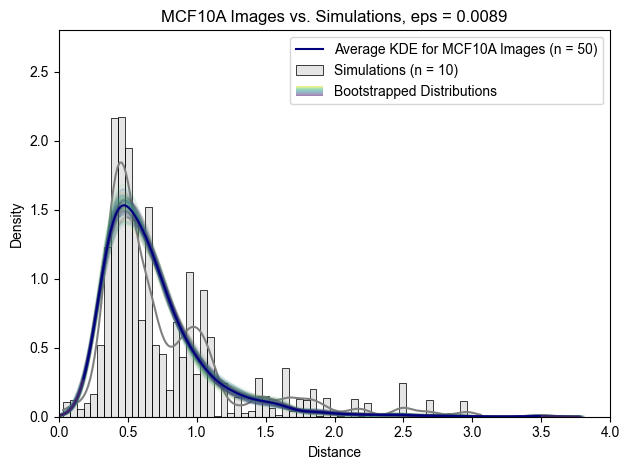

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 50)")

plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-18-df251ae93565>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


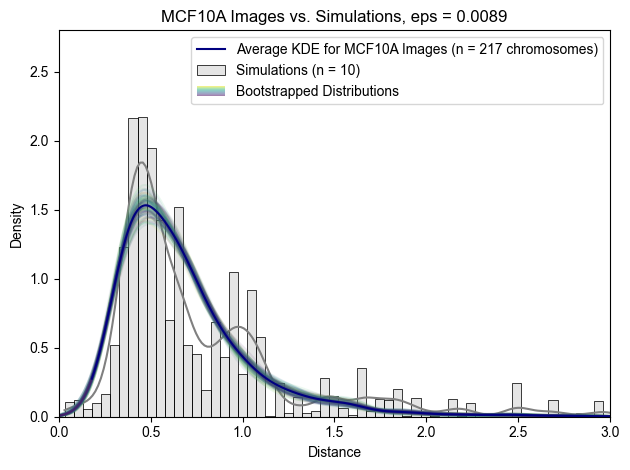

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)", multiple = 'stack')

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-19-df251ae93565>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


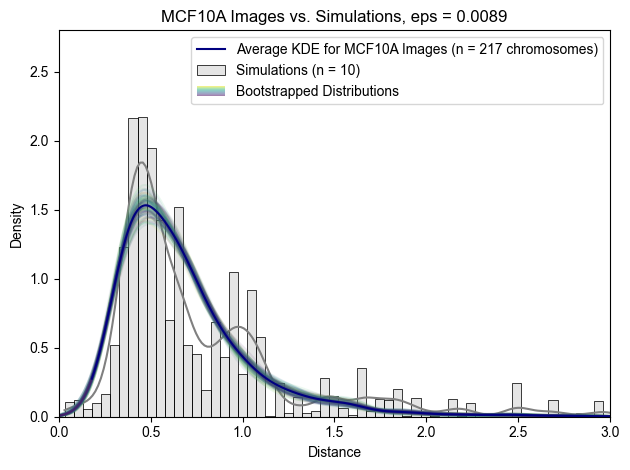

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)", multiple = 'stack')

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<Axes: xlabel='distance', ylabel='Density'>

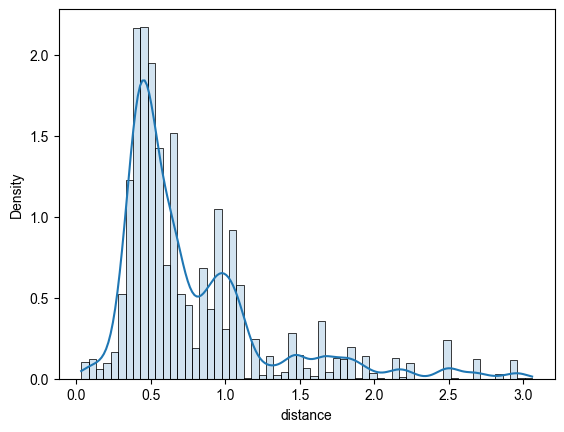

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False, alpha=0.2, kde=True,
             label="Simulations (n = 10)", multiple = 'stack')

In [ ]:
long_dist_df

cpc  cohesin  distance      Category
0      0.10     0.09  0.965127    eps = 0.01
1      0.10     0.09  0.833597    eps = 0.01
2      0.10     0.09  0.606898    eps = 0.01
3      0.10     0.09  0.965127    eps = 0.01
4      0.10     0.09  0.833597    eps = 0.01
...     ...      ...       ...           ...
43702  0.35     0.09  1.645919  eps = 0.0089
43703  0.35     0.09  2.466917  eps = 0.0089
43704  0.35     0.09  1.645919  eps = 0.0089
43705  0.35     0.09  1.034826  eps = 0.0089
43706  0.35     0.09  0.387379  eps = 0.0089

[43707 rows x 4 columns]

<Axes: xlabel='distance', ylabel='Density'>

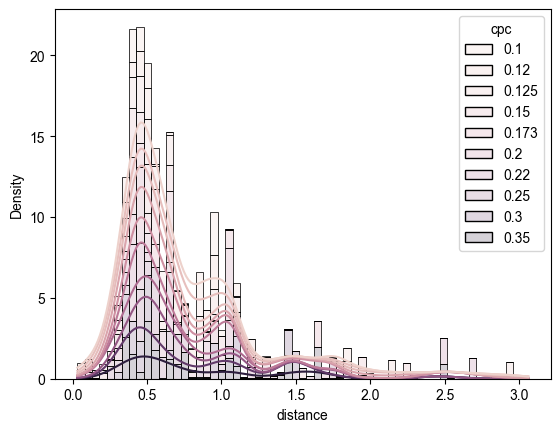

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False, alpha=0.2, kde=True,
             label="Simulations (n = 10)", multiple='stack', hue = "cpc")

<ipython-input-23-3ee1fd93e624>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


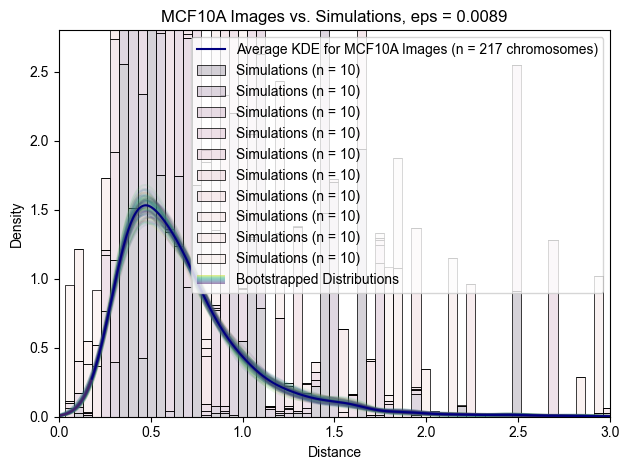

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False, alpha=0.2,
             label="Simulations (n = 10)", multiple='stack', hue = "cpc")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<Axes: xlabel='distance', ylabel='Density'>

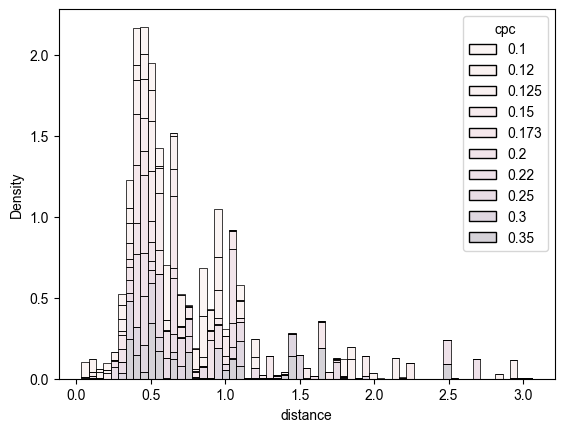

In [ ]:
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.2,
             label="Simulations (n = 10)", multiple='stack', hue = "cpc")

<ipython-input-25-355afa607780>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


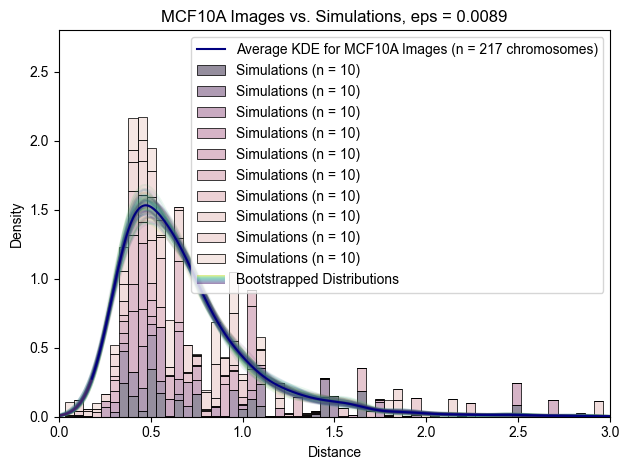

In [ ]:
# x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5,
             label="Simulations (n = 10)", multiple='stack', hue = "cpc")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

In [ ]:
# x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc", palette="Tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

ValueError: 'Tab10' is not a valid palette name

<ipython-input-27-df923e6f2ab1>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


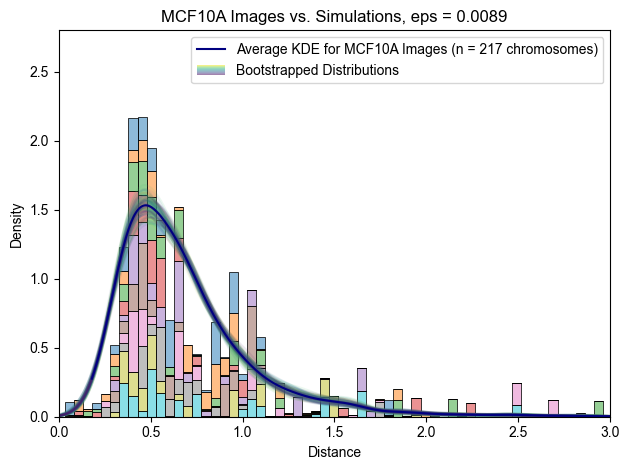

In [ ]:
# x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc", 
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-28-f8a8bca37ace>:11: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-28-f8a8bca37ace>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


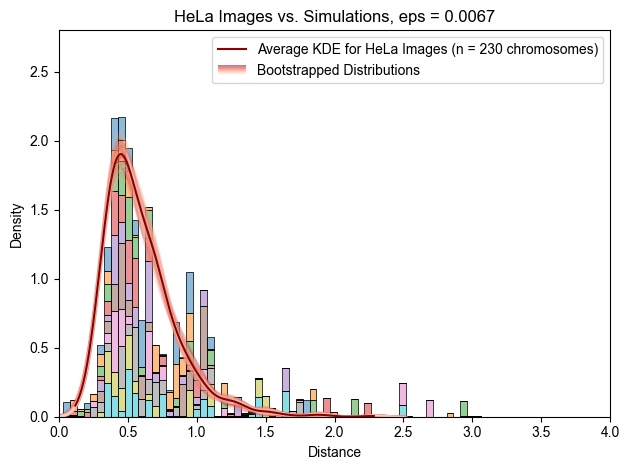

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 230 chromosomes)")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

<ipython-input-29-00fde0335cbf>:11: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-29-00fde0335cbf>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


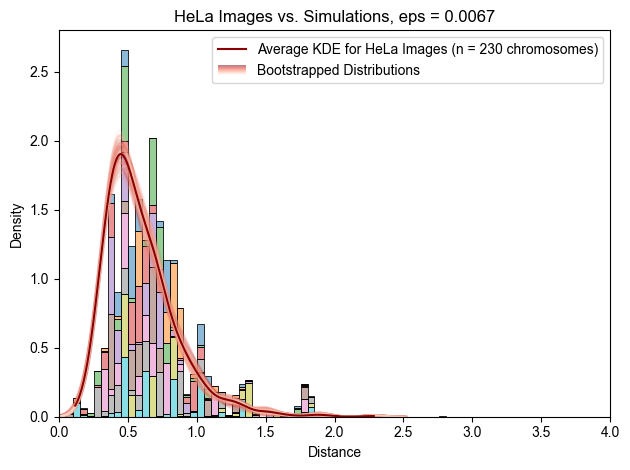

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 230 chromosomes)")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("HeLa Images vs. Simulations, eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']

cpc  cohesin  distance      Category
17760  0.10     0.09  1.016440  eps = 0.0067
17761  0.10     0.09  0.794110  eps = 0.0067
17762  0.10     0.09  0.718426  eps = 0.0067
17763  0.10     0.09  0.470931  eps = 0.0067
17764  0.10     0.09  0.551814  eps = 0.0067
...     ...      ...       ...           ...
27093  0.35     0.09  0.145112  eps = 0.0067
27094  0.35     0.09  0.473900  eps = 0.0067
27095  0.35     0.09  0.586070  eps = 0.0067
27096  0.35     0.09  0.380030  eps = 0.0067
27097  0.35     0.09  0.439231  eps = 0.0067

[9338 rows x 4 columns]

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'].groupby("cpc")

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'].groupby("cpc").count()

cohesin  distance  Category
cpc                               
0.100      793       793       793
0.120      777       777       777
0.125      934       934       934
0.150      990       990       990
0.173     1149      1149      1149
0.200     1029      1029      1029
0.220     1009      1009      1009
0.250      979       979       979
0.300      795       795       795
0.350      883       883       883

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-33-a8884e5b07d8>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-33-a8884e5b07d8>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


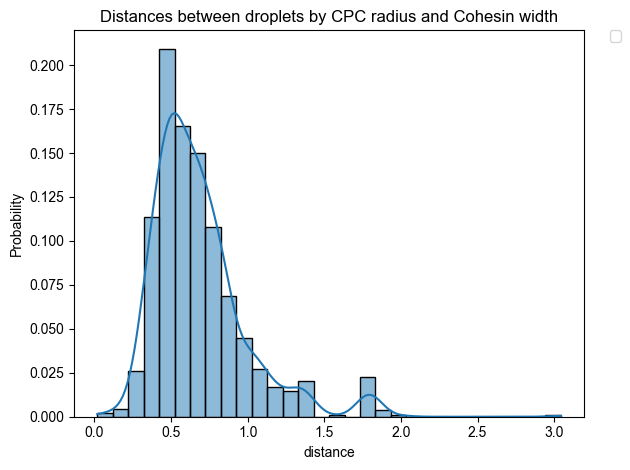

In [ ]:
long_dist_df5 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0067_noisy_cohesin_chr_lengths_HeLa_n_matched.csv",
)
sns.histplot(
    data=long_dist_df5,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-2-d8b0328ff3a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-34-2d41547c07e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-34-2d41547c07e9>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


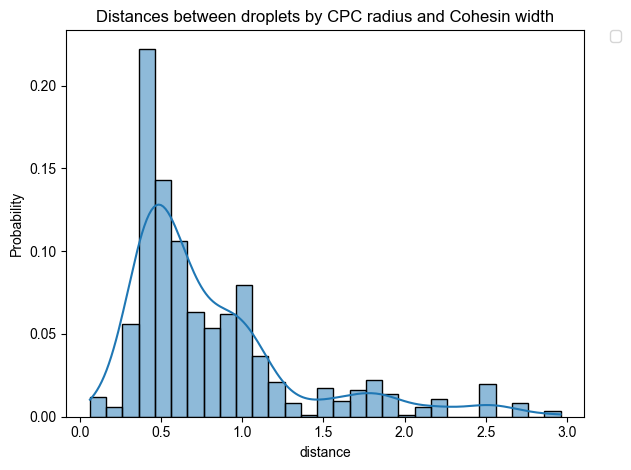

In [ ]:
long_dist_df6 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0089_noisy_cohesin_chr_lengths_MCF10A_n_matched.csv",
)
sns.histplot(
    data=long_dist_df6,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

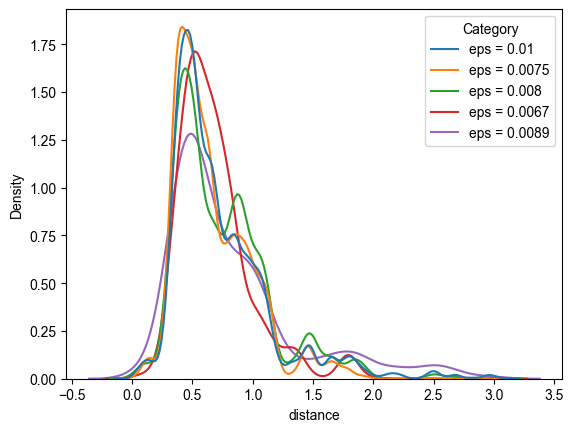

In [ ]:
outdir = f"{indir}/radii_lineplots_kymographs/domain_0_2_noisy_cohesin_sd_0.11"

binwidth = 0.05
long_dist_df["Category"] = "eps = 0.01"
long_dist_df2["Category"] = "eps = 0.0075"
long_dist_df3["Category"] = "eps = 0.005"
long_dist_df4["Category"] = "eps = 0.008"
long_dist_df5["Category"] = "eps = 0.0067"
long_dist_df6["Category"] = "eps = 0.0089"

long_dist_df = pd.concat(
    [long_dist_df, long_dist_df2,  # long_dist_df3,
        long_dist_df4, long_dist_df5, long_dist_df6], ignore_index=True
)
# sns.histplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     binwidth=binwidth,
#     stat="probability",
#     common_norm=False,
#     kde=True,
# )
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    # stat="probability",
    common_norm=False,
)
# plt.savefig(f"{outdir}/distances_between_droplets_histplot_sims_kdes_v4.png")
plt.show()

In [ ]:
# PLOTTING EXPERIMENT VS SIMULATION FIGURE 6
# KDE-based average distributions for HeLa and MCF10A


def compute_kde(bootstrapped_df):
    # df should be your DataFrame with "Category" and "distance"
    categories = bootstrapped_df["Category"].unique()

    # Common evaluation grid
    all_distances = bootstrapped_df["distance"].values
    x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

    # Compute KDE for each bootstrap category
    kde_vals = []

    for cat in categories:
        sample = bootstrapped_df[bootstrapped_df["Category"]
                                 == cat]["distance"].values
        kde = gaussian_kde(sample)
        kde_vals.append(kde(x_eval))

    kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

    # Average the KDEs
    avg_kde = np.mean(kde_vals, axis=0)
    return x_eval, avg_kde


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments

<ipython-input-37-d52a85b0cc50>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


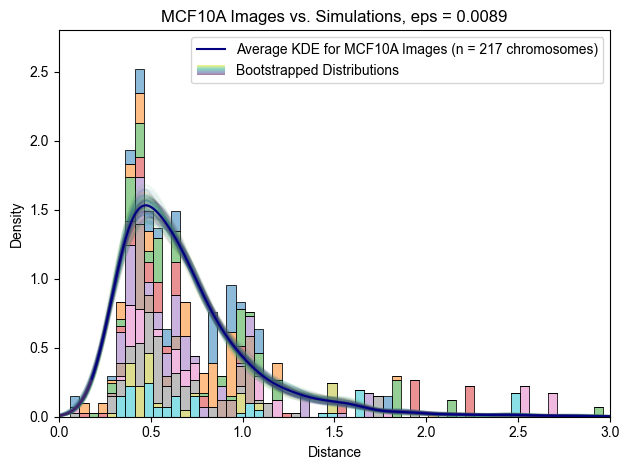

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images vs. Simulations, eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-38-09c1bcd8e9c1>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


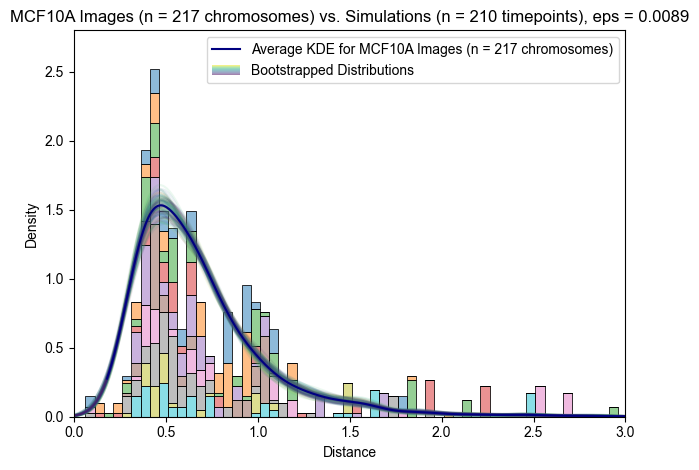

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label="Average KDE for MCF10A Images (n = 217 chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-39-4a6ccc4fd124>:11: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-39-4a6ccc4fd124>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


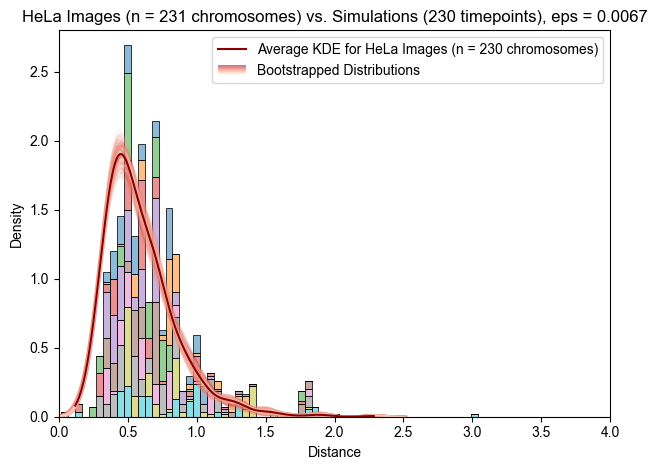

<Figure size 640x480 with 0 Axes>

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images (n = 230 chromosomes)")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']

cpc  cohesin  distance      Category
59902  0.10     0.09  0.718426  eps = 0.0067
59903  0.10     0.09  0.470931  eps = 0.0067
59904  0.10     0.09  0.551814  eps = 0.0067
59905  0.10     0.09  1.016440  eps = 0.0067
59906  0.10     0.09  0.794110  eps = 0.0067
...     ...      ...       ...           ...
60972  0.35     0.09  0.619012  eps = 0.0067
60973  0.35     0.09  1.833314  eps = 0.0067
60974  0.35     0.09  1.837137  eps = 0.0067
60975  0.35     0.09  1.833314  eps = 0.0067
60976  0.35     0.09  1.837137  eps = 0.0067

[1075 rows x 4 columns]

In [ ]:
long_dist_df5

cpc  cohesin  distance      Category
0     0.10     0.09  0.718426  eps = 0.0067
1     0.10     0.09  0.470931  eps = 0.0067
2     0.10     0.09  0.551814  eps = 0.0067
3     0.10     0.09  1.016440  eps = 0.0067
4     0.10     0.09  0.794110  eps = 0.0067
...    ...      ...       ...           ...
1070  0.35     0.09  0.619012  eps = 0.0067
1071  0.35     0.09  1.833314  eps = 0.0067
1072  0.35     0.09  1.837137  eps = 0.0067
1073  0.35     0.09  1.833314  eps = 0.0067
1074  0.35     0.09  1.837137  eps = 0.0067

[1075 rows x 4 columns]

In [ ]:
bootstrapped_df_MCF10A

Category seed time cpc cohesin  distance
0        Bootstrap 0    0    0   0       0   0.54117
1        Bootstrap 0    0    0   0       0   0.42091
2        Bootstrap 0    0    0   0       0   0.30065
3        Bootstrap 0    0    0   0       0   0.72156
4        Bootstrap 0    0    0   0       0   1.26273
...              ...  ...  ...  ..     ...       ...
92313  Bootstrap 100    0    0   0       0   0.36078
92314  Bootstrap 100    0    0   0       0   0.36078
92315  Bootstrap 100    0    0   0       0   0.84182
92316  Bootstrap 100    0    0   0       0   1.20260
92317  Bootstrap 100    0    0   0       0   1.38299

[92318 rows x 6 columns]

In [ ]:
MCF10A_peaks = pd.read_csv(
    "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/all_count_peaks.csv",
    header=0,
    index_col=0,
)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/all_count_peaks.csv'

In [ ]:
MCF10A_peaks = pd.read_csv("/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv",
                           header=0,
                           index_col=0,
                           )
MCF10A_peaks.head()

image_num  chr_num  chr_length IC_peaks  kt_peak  l_arm_length  \
0          1        5     39682.5     [47]       45       2.70585   
1          1        4     60125.1       []       73       4.38949   
2          1        3     51106.3     [39]       41       2.46533   
3          1        2     60125.1       []       47       2.82611   
4          1        1     58922.6     [63]       61       3.66793   

   r_arm_length                    left_peaks           right_peaks  \
0       1.26273               [6, 20, 27, 36]                    []   
1       1.62351  [12, 18, 26, 33, 48, 55, 64]              [86, 97]   
2       2.64572               [8, 19, 27, 30]                  [70]   
3       3.18689               [4, 12, 23, 31]  [62, 74, 82, 89, 93]   
4       2.22481   [5, 11, 17, 25, 32, 43, 55]              [77, 88]   

   chr_per_1.6um_L  chr_per_1.6um_R  
0                3                0  
1                3                2  
2                3                0  
3                2                1  
4                2                1

In [ ]:
MCF10A_peaks = pd.read_csv("/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv",
                           header=0,
                           index_col=0,
                           )
MCF10A_peaks.head()
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples_MCF10A = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples_MCF10A.append(ast.literal_eval(line.strip()))

In [ ]:
bootstrap_samples_MCF10A

[[6, 7, 8, 15, 17, 18, 21, 22, 24, 28, 29, 36, 37, 39, 41, 42, 43, 44, 47],
 [9, 11, 12, 14, 16, 17, 18, 23, 25, 28, 31, 34, 35, 36, 37, 39, 41, 42, 44],
 [1, 3, 4, 6, 7, 10, 17, 21, 22, 23, 27, 29, 34, 35, 36, 37, 41, 43, 47],
 [1, 3, 7, 10, 16, 17, 18, 22, 24, 25, 27, 29, 31, 33, 34, 35, 36, 39, 47],
 [1, 6, 7, 9, 11, 15, 16, 18, 19, 23, 24, 25, 26, 27, 28, 32, 36, 39, 44],
 [3, 4, 8, 12, 14, 15, 21, 22, 23, 25, 27, 28, 32, 33, 34, 35, 37, 42, 47],
 [1, 4, 6, 8, 12, 17, 18, 19, 22, 23, 27, 31, 32, 35, 36, 37, 39, 41, 44],
 [3, 6, 8, 12, 15, 21, 23, 25, 26, 27, 28, 31, 33, 34, 36, 37, 41, 42, 44],
 [3, 7, 9, 10, 15, 17, 19, 21, 24, 26, 27, 28, 29, 33, 34, 37, 39, 41, 43],
 [7, 9, 12, 14, 15, 16, 19, 24, 26, 27, 28, 33, 34, 35, 37, 42, 43, 44, 47],
 [3, 7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 23, 24, 32, 33, 35, 37, 43, 47],
 [1, 4, 7, 12, 14, 15, 18, 19, 21, 23, 25, 29, 33, 34, 35, 36, 41, 42, 43],
 [1, 3, 4, 8, 10, 11, 16, 18, 19, 23, 25, 31, 33, 34, 36, 39, 43, 44, 47],
 [1, 4, 6, 7, 

In [ ]:
MCF10A_peaks = pd.read_csv("/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv",
                           header=0,
                           index_col=0,
                           )
MCF10A_peaks.head()
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples_MCF10A = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples_MCF10A.append(ast.literal_eval(line.strip()))

for sample in bootstrap_samples_MCF10A:
    tmp = MCF10A_peaks.loc[MCF10A_peaks["image"].isin(sample)]
    print(len(tmp.index))

KeyError: 'image'

In [ ]:
MCF10A_peaks = pd.read_csv("/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv",
                           header=0,
                           index_col=0,
                           )
MCF10A_peaks.head()
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples_MCF10A = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples_MCF10A.append(ast.literal_eval(line.strip()))

for sample in bootstrap_samples_MCF10A:
    tmp = MCF10A_peaks.loc[MCF10A_peaks["image_num"].isin(sample)]
    print(len(tmp.index))

111
117
107
102
102
108
110
110
102
111
110
114
117
104
94
116
116
113
105
107
106
88
118
123
94
119
108
102
103
101
107
100
112
100
114
105
115
102
114
97
101
107
124
108
123
113
119
108
111
109
117
116
106
119
110
100
124
110
100
115
118
112
112
109
111
101
126
118
114
103
99
109
112
109
109
113
91
101
102
102
128
103
110
113
103
110
118
119
102
105
115
103
125
106
109
108
113
104
118
107
117


In [ ]:
MCF10A_peaks = pd.read_csv("/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv",
                           header=0,
                           index_col=0,
                           )
MCF10A_peaks.head()
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):    
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks_file.loc[peaks_file["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap

print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

[111, 117, 107, 102, 102, 108, 110, 110, 102, 111, 110, 114, 117, 104, 94, 116, 116, 113, 105, 107, 106, 88, 118, 123, 94, 119, 108, 102, 103, 101, 107, 100, 112, 100, 114, 105, 115, 102, 114, 97, 101, 107, 124, 108, 123, 113, 119, 108, 111, 109, 117, 116, 106, 119, 110, 100, 124, 110, 100, 115, 118, 112, 112, 109, 111, 101, 126, 118, 114, 103, 99, 109, 112, 109, 109, 113, 91, 101, 102, 102, 128, 103, 110, 113, 103, 110, 118, 119, 102, 105, 115, 103, 125, 106, 109, 108, 113, 104, 118, 107, 117]


In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks_file.loc[peaks_file["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

AttributeError: 'str' object has no attribute 'loc'

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

[111, 117, 107, 102, 102, 108, 110, 110, 102, 111, 110, 114, 117, 104, 94, 116, 116, 113, 105, 107, 106, 88, 118, 123, 94, 119, 108, 102, 103, 101, 107, 100, 112, 100, 114, 105, 115, 102, 114, 97, 101, 107, 124, 108, 123, 113, 119, 108, 111, 109, 117, 116, 106, 119, 110, 100, 124, 110, 100, 115, 118, 112, 112, 109, 111, 101, 126, 118, 114, 103, 99, 109, 112, 109, 109, 113, 91, 101, 102, 102, 128, 103, 110, 113, 103, 110, 118, 119, 102, 105, 115, 103, 125, 106, 109, 108, 113, 104, 118, 107, 117]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    print(peaks.head())
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


# print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

   image_num  chr_num  chr_length  IC_peaks  kt_peak  l_arm_length  \
0          0       25     4.56959      [15]       18       1.08234   
1          0       24     4.74997      [29]       32       1.92416   
2          0       23     4.08858  [39, 45]       44       2.64572   
3          0       22     3.66770      [33]       34       2.04442   
4          0       21     4.02845  [18, 25]       22       1.32286   

   r_arm_length       left_peaks               right_peaks  chr_per_1.6um_L  \
0       3.48754          [2, 10]  [35, 41, 48, 56, 62, 70]                2   
1       2.82611          [8, 18]      [42, 50, 57, 64, 73]                2   
2       1.44312  [8, 17, 24, 33]                      [54]                2   
3       1.62351          [6, 16]                      [56]                1   
4       2.70585          [2, 10]              [41, 50, 55]                2   

   chr_per_1.6um_R  
0                2  
1                3  
2                1  
3                1  

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    print(peaks.head())
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[int(peaks["image_num"]).isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


# print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

   image_num  chr_num  chr_length  IC_peaks  kt_peak  l_arm_length  \
0          0       25     4.56959      [15]       18       1.08234   
1          0       24     4.74997      [29]       32       1.92416   
2          0       23     4.08858  [39, 45]       44       2.64572   
3          0       22     3.66770      [33]       34       2.04442   
4          0       21     4.02845  [18, 25]       22       1.32286   

   r_arm_length       left_peaks               right_peaks  chr_per_1.6um_L  \
0       3.48754          [2, 10]  [35, 41, 48, 56, 62, 70]                2   
1       2.82611          [8, 18]      [42, 50, 57, 64, 73]                2   
2       1.44312  [8, 17, 24, 33]                      [54]                2   
3       1.62351          [6, 16]                      [56]                1   
4       2.70585          [2, 10]              [41, 50, 55]                2   

   chr_per_1.6um_R  
0                2  
1                3  
2                1  
3                1  

TypeError: cannot convert the series to <class 'int'>

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    print(peaks.head())
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[int(i).isin(sample) for i in peaks["image_num"]]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


# print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

SyntaxError: invalid syntax (<ipython-input-54-a60d7731e688>, line 21)

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    print(peaks.head())
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[[int(i).isin(sample) for i in peaks["image_num"]]]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


# print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

   image_num  chr_num  chr_length  IC_peaks  kt_peak  l_arm_length  \
0          0       25     4.56959      [15]       18       1.08234   
1          0       24     4.74997      [29]       32       1.92416   
2          0       23     4.08858  [39, 45]       44       2.64572   
3          0       22     3.66770      [33]       34       2.04442   
4          0       21     4.02845  [18, 25]       22       1.32286   

   r_arm_length       left_peaks               right_peaks  chr_per_1.6um_L  \
0       3.48754          [2, 10]  [35, 41, 48, 56, 62, 70]                2   
1       2.82611          [8, 18]      [42, 50, 57, 64, 73]                2   
2       1.44312  [8, 17, 24, 33]                      [54]                2   
3       1.62351          [6, 16]                      [56]                1   
4       2.70585          [2, 10]              [41, 50, 55]                2   

   chr_per_1.6um_R  
0                2  
1                3  
2                1  
3                1  

AttributeError: 'int' object has no attribute 'isin'

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    print(peaks.head())
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        if len(tmp.index) == 0:
            sample = [str(i) for i in sample]
            tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


# print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

   image_num  chr_num  chr_length  IC_peaks  kt_peak  l_arm_length  \
0          0       25     4.56959      [15]       18       1.08234   
1          0       24     4.74997      [29]       32       1.92416   
2          0       23     4.08858  [39, 45]       44       2.64572   
3          0       22     3.66770      [33]       34       2.04442   
4          0       21     4.02845  [18, 25]       22       1.32286   

   r_arm_length       left_peaks               right_peaks  chr_per_1.6um_L  \
0       3.48754          [2, 10]  [35, 41, 48, 56, 62, 70]                2   
1       2.82611          [8, 18]      [42, 50, 57, 64, 73]                2   
2       1.44312  [8, 17, 24, 33]                      [54]                2   
3       1.62351          [6, 16]                      [56]                1   
4       2.70585          [2, 10]              [41, 50, 55]                2   

   chr_per_1.6um_R  
0                2  
1                3  
2                1  
3                1  

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    print(peaks.head())
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        if len(tmp.index) == 0:
            sample = [int(i) for i in sample]
            tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


# print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

   image_num  chr_num  chr_length  IC_peaks  kt_peak  l_arm_length  \
0          0       25     4.56959      [15]       18       1.08234   
1          0       24     4.74997      [29]       32       1.92416   
2          0       23     4.08858  [39, 45]       44       2.64572   
3          0       22     3.66770      [33]       34       2.04442   
4          0       21     4.02845  [18, 25]       22       1.32286   

   r_arm_length       left_peaks               right_peaks  chr_per_1.6um_L  \
0       3.48754          [2, 10]  [35, 41, 48, 56, 62, 70]                2   
1       2.82611          [8, 18]      [42, 50, 57, 64, 73]                2   
2       1.44312  [8, 17, 24, 33]                      [54]                2   
3       1.62351          [6, 16]                      [56]                1   
4       2.70585          [2, 10]              [41, 50, 55]                2   

   chr_per_1.6um_R  
0                2  
1                3  
2                1  
3                1  

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        if len(tmp.index) == 0:
            sample = [int(i) for i in sample]
            tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


print(count_chromosomes_per_bootstrap(bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

print(count_chromosomes_per_bootstrap(bootstrap_samples_HeLa, HeLa_peaks))

[111, 117, 107, 102, 102, 108, 110, 110, 102, 111, 110, 114, 117, 104, 94, 116, 116, 113, 105, 107, 106, 88, 118, 123, 94, 119, 108, 102, 103, 101, 107, 100, 112, 100, 114, 105, 115, 102, 114, 97, 101, 107, 124, 108, 123, 113, 119, 108, 111, 109, 117, 116, 106, 119, 110, 100, 124, 110, 100, 115, 118, 112, 112, 109, 111, 101, 126, 118, 114, 103, 99, 109, 112, 109, 109, 113, 91, 101, 102, 102, 128, 103, 110, 113, 103, 110, 118, 119, 102, 105, 115, 103, 125, 106, 109, 108, 113, 104, 118, 107, 117]
[127, 131, 142, 92, 144, 85, 126, 124, 113, 133, 88, 117, 95, 98, 147, 134, 99, 131, 97, 111, 149, 116, 98, 131, 118, 115, 102, 84, 100, 120, 132, 138, 124, 100, 94, 91, 144, 136, 91, 133, 97, 94, 137, 147, 133, 129, 107, 138, 103, 130, 116, 133, 144, 113, 118, 137, 106, 102, 113, 122, 91, 104, 139, 139, 120, 124, 105, 100, 109, 95, 117, 87, 133, 98, 96, 92, 107, 82, 104, 95, 125, 89, 118, 129, 103, 120, 101, 122, 147, 105, 107, 136, 118, 137, 104, 135, 93, 126, 141, 91]


In [ ]:
s

47

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        if len(tmp.index) == 0:
            sample = [int(i) for i in sample]
            tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


MCF10A_chr_n = (count_chromosomes_per_bootstrap(
    bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

HeLa_chr_n = (count_chromosomes_per_bootstrap(
    bootstrap_samples_HeLa, HeLa_peaks))

<ipython-input-61-0b8f6392cc61>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


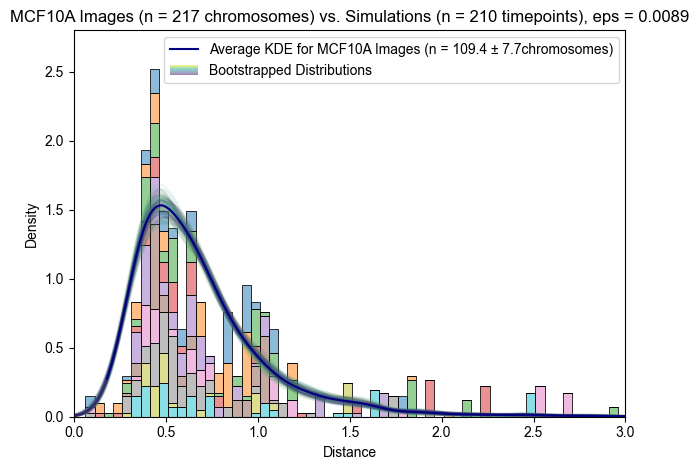

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#              stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
#              label="Simulations (n = 10)")

sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
             palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images (n = {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chromosomes)")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[*labels, "Bootstrapped Distributions"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-62-2cfacad04a7e>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


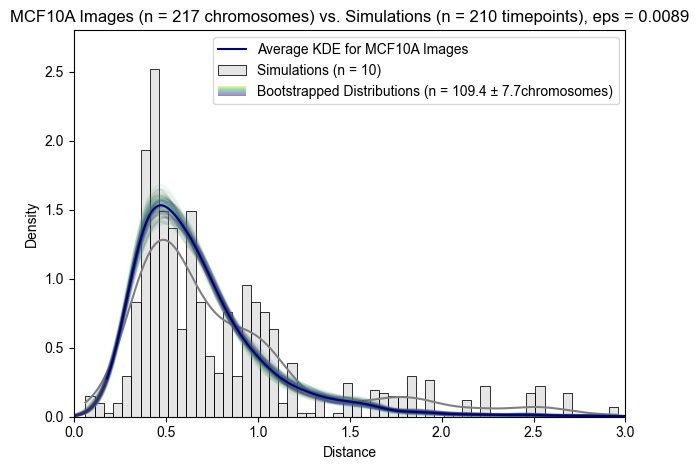

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label="Simulations (n = 10)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
            #  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
            #  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chromosomes)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']

cpc  cohesin  distance      Category
60977  0.10     0.09  1.109663  eps = 0.0089
60978  0.10     0.09  0.953413  eps = 0.0089
60979  0.10     0.09  0.840131  eps = 0.0089
60980  0.10     0.09  1.798354  eps = 0.0089
60981  0.10     0.09  1.109663  eps = 0.0089
...     ...      ...       ...           ...
61791  0.35     0.09  0.334242  eps = 0.0089
61792  0.35     0.09  0.556749  eps = 0.0089
61793  0.35     0.09  0.566551  eps = 0.0089
61794  0.35     0.09  0.468275  eps = 0.0089
61795  0.35     0.09  0.387379  eps = 0.0089

[819 rows x 4 columns]

In [ ]:
from matplotlib import cm
from matplotlib.legend_handler import HandlerBase
from matplotlib.patches import Rectangle
from scipy.stats import gaussian_kde
import ast
from itertools import combinations
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
indir = "/Users/smgroves/Documents/GitHub/Cahn_Hilliard_Model/plotting"
outdir = (
    f"{indir}/distance_between_droplets/"
)


def make_long_dist_df(indir, file):
    # dist = pd.read_csv(f"{indir}/distance_between_droplets.csv",converters={'distances': pd.eval})
    dist = pd.read_csv(f"{indir}/{file}", header=0)
    long_dist_df = pd.DataFrame(
        # columns=["seed", "cpc", 'cohesin', 'time', 'distance'])
        columns=["cpc", "cohesin", "distance"]
    )

    for i, r in dist.iterrows():
        dist_list = str(r["distances"])[1:-2].split(" ")
        try:
            dist_list = [float(d) for d in dist_list]
            for d in dist_list:
                long_dist_df = pd.concat(
                    [
                        long_dist_df,
                        pd.DataFrame(
                            {
                                # "seed": [r["seed"]],
                                "time": [r["time"]],
                                "cpc": [r["cpc"]],
                                "cohesin": [r["cohesin"]],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except ValueError:
            pass
    return long_dist_df

<ipython-input-65-f08632b4b686>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-66-cf4bf3782fa0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-66-cf4bf3782fa0>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


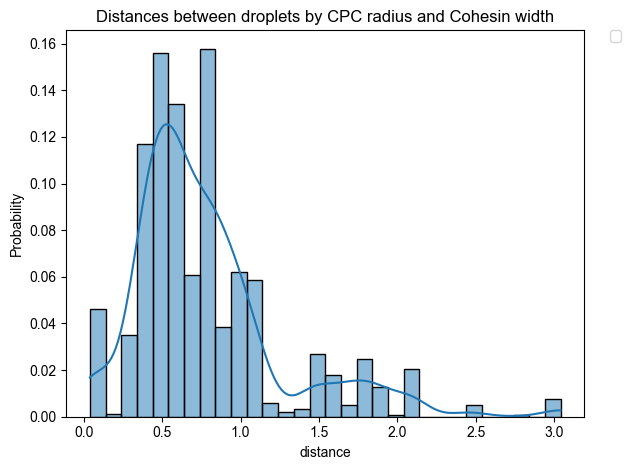

In [ ]:
long_dist_df = make_long_dist_df(
    indir,
    "simulated_droplet_distributions/simulated_droplet_distances_e_0.01_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}distances_between_droplets_swarmplot_0.0075.png")

In [ ]:
# long_dist_df = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_domain_0_2_chr_lengths.csv",
# )
# sns.histplot(
#     data=long_dist_df, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
# outdir = f"{indir}/radii_lineplots_kymographs/domain_0_1_eps_0.0075/"

# long_dist_df2 = make_long_dist_df(
#     indir,
#     file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_domain_0_1_chr_lengths.csv",
# )
# sns.histplot(
#     data=long_dist_df2, x="distance", palette=sns.color_palette("muted"), bins=30
# )

# # sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

In [ ]:
long_dist_df2 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0075_noisy_cohesin_sd_0.11.csv",
)

<ipython-input-65-f08632b4b686>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(


In [ ]:
# outdir = f"{indir}/radii_lineplots_kymographs/domain_0_2_noisy_cohesin_sd_0.11"

# sns.histplot(
#     data=long_dist_df2,
#     x="distance",
#     palette=sns.color_palette("muted"),
#     binwidth=0.05,
#     stat="probability",
#     common_norm=False,
#     kde=True,
# )
# plt.xlabel("Distance (um)")
# plt.ylim(0, 0.16)
# plt.xlim(0, 3.2)
# # plt.tight_layout()
# # plt.savefig(f"{outdir}/sim_histplot_eps_0.0075_bin_0.05.pdf")
# plt.show()

In [ ]:
# sns.swarmplot(
#     data=long_dist_df,
#     x="cohesin",
#     y="distance",
#     hue="cpc",
#     palette=sns.color_palette("muted"),
#     size=4,
# )
# plt.title("Distances between droplets by CPC radius and Cohesin width")
# plt.ylim(0, 0.16)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.tight_layout()
# plt.show()

<ipython-input-65-f08632b4b686>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-72-e65656cc6fef>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-72-e65656cc6fef>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


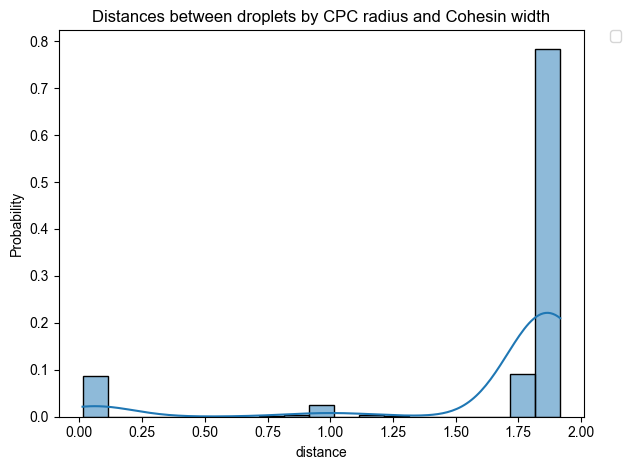

In [ ]:
long_dist_df3 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.005_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df3,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-65-f08632b4b686>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-73-5deb2d1a27cb>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-73-5deb2d1a27cb>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


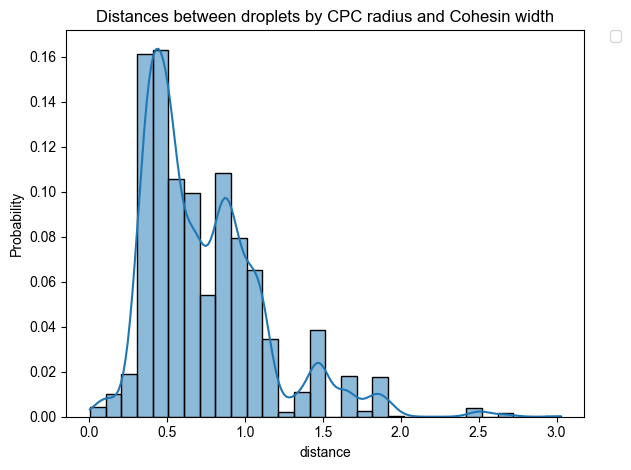

In [ ]:
long_dist_df4 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.008_noisy_cohesin_chr_lengths.csv",
)
sns.histplot(
    data=long_dist_df4,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-65-f08632b4b686>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-74-a8884e5b07d8>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-74-a8884e5b07d8>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


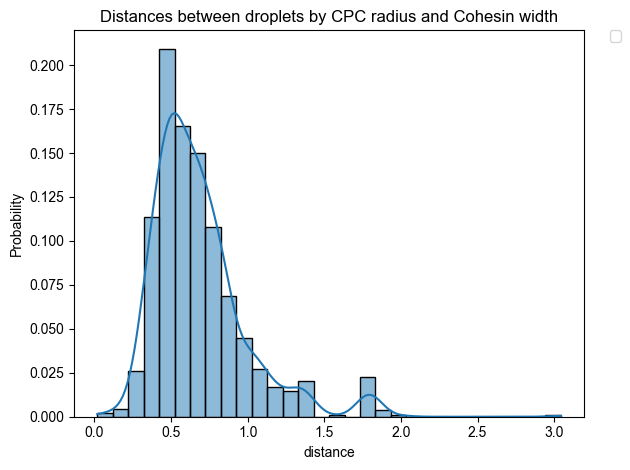

In [ ]:
long_dist_df5 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0067_noisy_cohesin_chr_lengths_HeLa_n_matched.csv",
)
sns.histplot(
    data=long_dist_df5,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

<ipython-input-65-f08632b4b686>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_dist_df = pd.concat(
<ipython-input-75-2d41547c07e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-75-2d41547c07e9>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


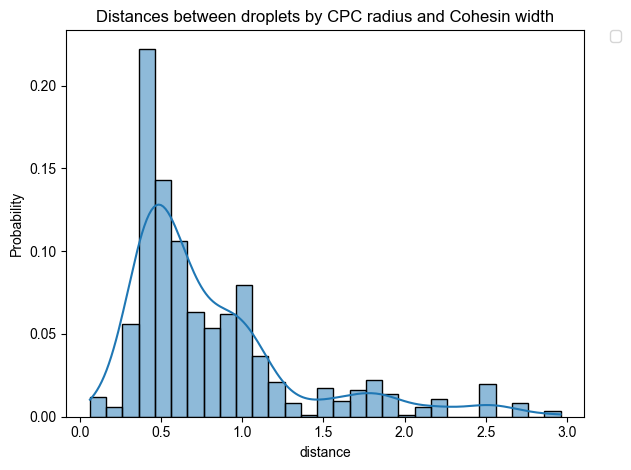

In [ ]:
long_dist_df6 = make_long_dist_df(
    indir,
    file="simulated_droplet_distributions/simulated_droplet_distances_e_0.0089_noisy_cohesin_chr_lengths_MCF10A_n_matched.csv",
)
sns.histplot(
    data=long_dist_df6,
    x="distance",
    palette=sns.color_palette("muted"),
    binwidth=0.1,
    stat="probability",
    common_norm=False,
    kde=True,
)

# sns.swarmplot(data= long_dist_df, x = 'cohesin', y = 'distance', hue = 'cpc', palette=sns.color_palette("muted"), size = 4)
plt.title("Distances between droplets by CPC radius and Cohesin width")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

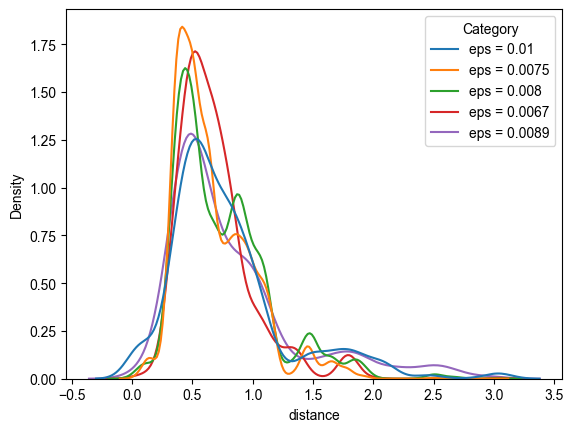

In [ ]:
outdir = f"{indir}/radii_lineplots_kymographs/domain_0_2_noisy_cohesin_sd_0.11"

binwidth = 0.05
long_dist_df["Category"] = "eps = 0.01"
long_dist_df2["Category"] = "eps = 0.0075"
long_dist_df3["Category"] = "eps = 0.005"
long_dist_df4["Category"] = "eps = 0.008"
long_dist_df5["Category"] = "eps = 0.0067"
long_dist_df6["Category"] = "eps = 0.0089"

long_dist_df = pd.concat(
    [long_dist_df, long_dist_df2,  # long_dist_df3,
        long_dist_df4, long_dist_df5, long_dist_df6], ignore_index=True
)
# sns.histplot(
#     data=long_dist_df,
#     x="distance",
#     hue="Category",
#     binwidth=binwidth,
#     stat="probability",
#     common_norm=False,
#     kde=True,
# )
sns.kdeplot(
    data=long_dist_df,
    x="distance",
    hue="Category",
    # stat="probability",
    common_norm=False,
)
# plt.savefig(f"{outdir}/distances_between_droplets_histplot_sims_kdes_v4.png")
plt.show()

In [ ]:
# the below code is pulled from distances_between_droplets.py in the CPC_condensate_images folder on Box.
def inter_droplet_distance(indir, image):
    distance_dict = {}
    tmp = pd.read_csv(
        f"{indir}/count_peaks_image{image}_.csv",
        header=0,
        index_col=0,
        converters={"IC_peaks": pd.eval,
                    "left_peaks": pd.eval, "right_peaks": pd.eval},
    )
    for i, r in tmp.iterrows():
        ic = list(r["IC_peaks"])
        left = list(r["left_peaks"])
        right = list(r["right_peaks"])
        [ic.extend(l) for l in (left, right)]
        all_peaks = sorted(ic)

        distances = []
        for j in range(len(all_peaks) - 1):
            d = (all_peaks[j + 1] - all_peaks[j]) * 0.06013
            distances.append(d)
        distance_dict[i] = distances
    return distance_dict


indir2 = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis"
all_images = []
all_images_dict = {}
for image in range(10):
    distance_dict = inter_droplet_distance(indir2, image=image)
    # all_images_dict[image] = distance_dict
    all_ = []
    for k in distance_dict.keys():
        all_.extend(distance_dict[k])
    all_images_dict[f"{image}"] = all_
    all_images.extend(all_)

print(all_images_dict)

{'0': [0.48104, 0.30065000000000003, 1.2026000000000001, 0.36078, 0.42091, 0.48104, 0.36078, 0.48104, 0.6013000000000001, 0.6614300000000001, 0.78169, 0.48104, 0.42091, 0.42091, 0.54117, 0.54117, 0.42091, 0.54117, 0.36078, 0.36078, 0.54117, 0.6013000000000001, 1.02221, 1.3829900000000002, 0.48104, 0.48104, 0.42091, 0.96208, 0.54117, 0.30065000000000003, 0.54117, 0.6013000000000001, 0.36078, 0.36078, 0.30065000000000003, 0.48104, 1.02221, 0.48104, 0.42091, 0.48104, 0.30065000000000003, 0.54117, 0.36078, 0.36078, 0.54117, 0.96208, 0.90195, 0.42091, 0.48104, 0.42091, 0.54117, 1.02221, 0.54117, 0.6614300000000001, 0.6614300000000001, 1.2026000000000001, 0.6614300000000001, 0.90195, 0.42091, 0.42091, 0.42091, 0.36078, 0.6614300000000001, 0.6614300000000001, 0.24052, 0.42091, 0.78169, 0.78169, 1.2627300000000001, 0.84182, 0.30065000000000003, 0.30065000000000003, 0.72156, 0.6614300000000001, 0.24052, 0.6614300000000001, 0.84182, 0.54117, 0.48104, 0.48104, 0.72156, 0.78169, 0.6614300000000001

In [ ]:
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples.append(ast.literal_eval(line.strip()))

# make distributions
bootstrapped_df = pd.DataFrame(
    columns=["Category", "seed", "time", "cpc", "cohesin", "distance"])
for n, samples in enumerate(bootstrap_samples):
    print(n/len(bootstrap_samples))
    for s in samples:
        try:
            for d in all_images_dict[s]:
                bootstrapped_df = pd.concat(
                    [
                        bootstrapped_df,
                        pd.DataFrame(
                            {
                                "Category": [f"Bootstrap {n}"],
                                "seed": [0],
                                "time": [0],
                                "cpc": [0],
                                "cohesin": [0],
                                "distance": [d],
                            }
                        ),
                    ],
                    ignore_index=True,
                )
        except KeyError:
            pass

0.0


<ipython-input-78-04faf88f084c>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrapped_df = pd.concat(


0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [ ]:
#########################################################
# MCF10A bootstrapping
#########################################################


indir_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/"
all_images_MCF10A = []
all_images_dict_MCF10A = {}
for image in range(1, 50):
    try:
        distance_dict = inter_droplet_distance(indir_MCF10A, image=image)
        # all_images_dict[image] = distance_dict
        all_ = []
        for k in distance_dict.keys():
            all_.extend(distance_dict[k])
        all_images_dict_MCF10A[f"{image}"] = all_
        all_images_MCF10A.extend(all_)
    except FileNotFoundError:
        print(f"File not found for image {image}.")

print(all_images_dict_MCF10A)

File not found for image 2.
File not found for image 5.
File not found for image 13.
File not found for image 20.
File not found for image 30.
File not found for image 38.
File not found for image 40.
File not found for image 45.
File not found for image 46.
File not found for image 48.
File not found for image 49.
{'1': [0.84182, 0.42091, 0.54117, 0.6614300000000001, 0.36078, 0.48104, 0.42091, 0.90195, 0.42091, 0.54117, 1.3228600000000001, 0.6614300000000001, 0.6614300000000001, 0.48104, 0.18039, 0.54117, 1.86403, 0.48104, 0.6614300000000001, 0.48104, 1.86403, 0.72156, 0.48104, 0.42091, 0.24052, 0.36078, 0.36078, 0.48104, 0.42091, 0.6614300000000001, 0.72156, 0.48104, 0.84182, 0.6614300000000001, 0.48104, 0.36078, 0.42091, 1.2627300000000001, 0.72156, 0.72156, 0.72156, 0.36078, 0.84182], '3': [1.08234, 0.42091, 0.78169, 0.6013000000000001, 0.6614300000000001, 0.36078, 0.36078, 0.30065000000000003, 0.42091, 0.48104, 0.42091, 1.3829900000000002, 1.14247, 0.42091, 1.50325], '4': [0.54117

In [ ]:
bootstrap_samples_file = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"
bootstrap_samples = []
with open(bootstrap_samples_file, "r") as f:
    for line in f:
        # Strip newline characters and convert the string to a list
        bootstrap_samples.append(ast.literal_eval(line.strip()))

# make distributions
bootstrapped_df_MCF10A = pd.DataFrame(
    columns=["Category", "seed", "time", "cpc", "cohesin", "distance"])
for n, samples in enumerate(bootstrap_samples):
    print(n/len(bootstrap_samples))
    for s in samples:
        # try:
        for d in all_images_dict_MCF10A[f"{s}"]:
            bootstrapped_df_MCF10A = pd.concat(
                [
                    bootstrapped_df_MCF10A,
                    pd.DataFrame(
                        {
                            "Category": [f"Bootstrap {n}"],
                            "seed": [0],
                            "time": [0],
                            "cpc": [0],
                            "cohesin": [0],
                            "distance": [d],
                        }
                    ),
                ],
                ignore_index=True,
            )
        # except KeyError:
            # pass

0.0


<ipython-input-80-fe439424dfed>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrapped_df_MCF10A = pd.concat(


0.009900990099009901
0.019801980198019802
0.0297029702970297
0.039603960396039604
0.04950495049504951
0.0594059405940594
0.06930693069306931
0.07920792079207921
0.0891089108910891
0.09900990099009901
0.10891089108910891
0.1188118811881188
0.12871287128712872
0.13861386138613863
0.1485148514851485
0.15841584158415842
0.16831683168316833
0.1782178217821782
0.18811881188118812
0.19801980198019803
0.2079207920792079
0.21782178217821782
0.22772277227722773
0.2376237623762376
0.24752475247524752
0.25742574257425743
0.26732673267326734
0.27722772277227725
0.2871287128712871
0.297029702970297
0.3069306930693069
0.31683168316831684
0.32673267326732675
0.33663366336633666
0.3465346534653465
0.3564356435643564
0.36633663366336633
0.37623762376237624
0.38613861386138615
0.39603960396039606
0.40594059405940597
0.4158415841584158
0.42574257425742573
0.43564356435643564
0.44554455445544555
0.45544554455445546
0.46534653465346537
0.4752475247524752
0.48514851485148514
0.49504950495049505
0.50495049504

In [ ]:
# PLOTTING EXPERIMENT VS SIMULATION FIGURE 6
# KDE-based average distributions for HeLa and MCF10A


def compute_kde(bootstrapped_df):
    # df should be your DataFrame with "Category" and "distance"
    categories = bootstrapped_df["Category"].unique()

    # Common evaluation grid
    all_distances = bootstrapped_df["distance"].values
    x_eval = np.linspace(np.min(all_distances), np.max(all_distances), 500)

    # Compute KDE for each bootstrap category
    kde_vals = []

    for cat in categories:
        sample = bootstrapped_df[bootstrapped_df["Category"]
                                 == cat]["distance"].values
        kde = gaussian_kde(sample)
        kde_vals.append(kde(x_eval))

    kde_vals = np.array(kde_vals)  # shape: (n_bootstraps, 500)

    # Average the KDEs
    avg_kde = np.mean(kde_vals, axis=0)
    return x_eval, avg_kde


class HandlerVerticalGradient(HandlerBase):
    def __init__(self, cmap, n_segments=100, alpha=1.0, **kwargs):
        self.cmap = cmap
        self.n_segments = n_segments
        self.alpha = alpha
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        segments = []
        for i in range(self.n_segments):
            y = y0 + height * i / self.n_segments
            rgba = self.cmap(i / self.n_segments)
            rgba_with_alpha = rgba[:3] + (self.alpha,)
            rect = Rectangle(
                (x0, y),
                width,
                height / self.n_segments,
                facecolor=rgba_with_alpha,
                transform=trans,
                linewidth=0
            )
            segments.append(rect)
        return segments

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))

    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        if len(tmp.index) == 0:
            sample = [int(i) for i in sample]
            tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap


MCF10A_chr_n = (count_chromosomes_per_bootstrap(
    bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

HeLa_chr_n = (count_chromosomes_per_bootstrap(
    bootstrap_samples_HeLa, HeLa_peaks))

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']

cpc  cohesin  distance      time      Category
18835  0.10     0.09  1.109663  0.015541  eps = 0.0089
18836  0.10     0.09  0.953413  0.015541  eps = 0.0089
18837  0.10     0.09  0.840131  0.015541  eps = 0.0089
18838  0.10     0.09  1.798354  0.015541  eps = 0.0089
18839  0.10     0.09  1.109663  0.019128  eps = 0.0089
...     ...      ...       ...       ...           ...
19649  0.35     0.09  0.334242  0.006274  eps = 0.0089
19650  0.35     0.09  0.556749  0.006274  eps = 0.0089
19651  0.35     0.09  0.566551  0.006274  eps = 0.0089
19652  0.35     0.09  0.468275  0.006274  eps = 0.0089
19653  0.35     0.09  0.387379  0.006274  eps = 0.0089

[819 rows x 5 columns]

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique()

array([0.1  , 0.12 , 0.125, 0.15 , 0.173, 0.2  , 0.22 , 0.25 , 0.3  ,
       0.35 ])

In [ ]:
long_dist_df


cpc  cohesin  distance      time      Category
0      0.10     0.09  0.965127  0.005305    eps = 0.01
1      0.10     0.09  0.833597  0.005305    eps = 0.01
2      0.10     0.09  0.606898  0.007957    eps = 0.01
3      0.10     0.09  0.965127  0.007957    eps = 0.01
4      0.10     0.09  0.833597  0.007957    eps = 0.01
...     ...      ...       ...       ...           ...
19649  0.35     0.09  0.334242  0.006274  eps = 0.0089
19650  0.35     0.09  0.556749  0.006274  eps = 0.0089
19651  0.35     0.09  0.566551  0.006274  eps = 0.0089
19652  0.35     0.09  0.468275  0.006274  eps = 0.0089
19653  0.35     0.09  0.387379  0.006274  eps = 0.0089

[19654 rows x 5 columns]

In [ ]:
long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['time'].unique()

array([0.015541, 0.019128, 0.007219, 0.020277, 0.008669, 0.020146,
       0.020845, 0.007639, 0.006717, 0.020023, 0.025314, 0.010326,
       0.023398, 0.020242, 0.018048, 0.011591, 0.027451, 0.013872,
       0.012729, 0.013824, 0.009671, 0.014136, 0.005273, 0.021642,
       0.014195, 0.004578, 0.010226, 0.018208, 0.005748, 0.022134,
       0.007278, 0.008063, 0.005659, 0.008624, 0.002733, 0.017284,
       0.020496, 0.016393, 0.012767, 0.019325, 0.01942 , 0.020361,
       0.019063, 0.028339, 0.006264, 0.021263, 0.007082, 0.003578,
       0.018204, 0.013492, 0.013748, 0.019838, 0.023085, 0.010506,
       0.012483, 0.024982, 0.00769 , 0.018398, 0.017461, 0.016216,
       0.007939, 0.009537, 0.003574, 0.019353, 0.014372, 0.019164,
       0.016327, 0.019402, 0.016301, 0.021609, 0.015674, 0.006558,
       0.003172, 0.00329 , 0.001906, 0.012134, 0.013446, 0.01097 ,
       0.022894, 0.018826, 0.023146, 0.029163, 0.005756, 0.004163,
       0.020871, 0.002812, 0.015747, 0.015895, 0.025807, 0.014

In [ ]:
len(long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['time'].unique())

175

<ipython-input-88-90791c46c794>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


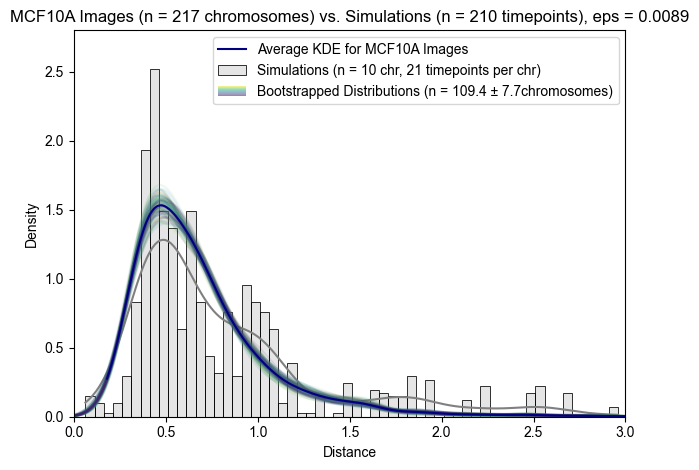

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {210//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chromosomes)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-89-6f2de7d04615>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


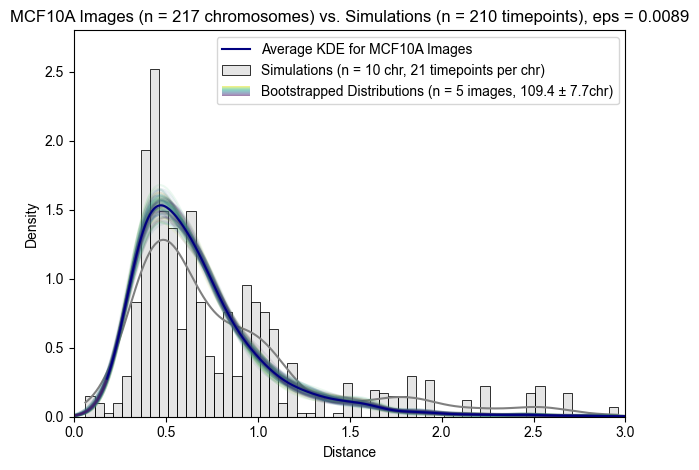

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {210//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = 5 images, {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

In [ ]:
bootstrapped_df_MCF10A

Category seed time cpc cohesin  distance
0        Bootstrap 0    0    0   0       0   0.54117
1        Bootstrap 0    0    0   0       0   0.42091
2        Bootstrap 0    0    0   0       0   0.30065
3        Bootstrap 0    0    0   0       0   0.72156
4        Bootstrap 0    0    0   0       0   1.26273
...              ...  ...  ...  ..     ...       ...
92313  Bootstrap 100    0    0   0       0   0.36078
92314  Bootstrap 100    0    0   0       0   0.36078
92315  Bootstrap 100    0    0   0       0   0.84182
92316  Bootstrap 100    0    0   0       0   1.20260
92317  Bootstrap 100    0    0   0       0   1.38299

[92318 rows x 6 columns]

In [ ]:
MCF10A_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/linescans/all_count_peaks.csv"
bootstrap_samples_MCF10A = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/MCF10A/MCF10A_CPC_analysis/analysis/bootstrapped/remaining_no_replacement.txt"


def count_chromosomes_per_bootstrap(bootstrap_samples_file, peaks_file):
    peaks = pd.read_csv(peaks_file,
                        header=0,
                        index_col=0,
                        )
    bootstrap_samples = []
    with open(bootstrap_samples_file, "r") as f:
        for line in f:
            # Strip newline characters and convert the string to a list
            bootstrap_samples.append(ast.literal_eval(line.strip()))
    num_images_per_bootstrap = len(bootstrap_samples[0])
    num_chromosomes_per_bootstrap = []
    for sample in bootstrap_samples:
        tmp = peaks.loc[peaks["image_num"].isin(sample)]
        if len(tmp.index) == 0:
            sample = [int(i) for i in sample]
            tmp = peaks.loc[peaks["image_num"].isin(sample)]
        num_chromosomes_per_bootstrap.append(len(tmp.index))
    return num_chromosomes_per_bootstrap, num_images_per_bootstrap


MCF10A_chr_n, MCF10A_image_n = (count_chromosomes_per_bootstrap(
    bootstrap_samples_MCF10A, MCF10A_peaks))

HeLa_peaks = "/Users/smgroves/Box/CPC_Model_Project/CPC_condensate_images/haspin_stripe_linescans/analysis/all_count_peaks.csv"
bootstrap_samples_HeLa = "/Users/smgroves/Library/CloudStorage/Box-Box/CPC_Model_Project/CPC_condensate_images/manual_condensates/bootstrapped/remaining_no_replacement.txt"

HeLa_chr_n, HeLa_image_n = (count_chromosomes_per_bootstrap(
    bootstrap_samples_HeLa, HeLa_peaks))

In [ ]:
HeLa_image_n

5

In [ ]:
MCF10A_image_n

19

<ipython-input-94-6561f735f104>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},


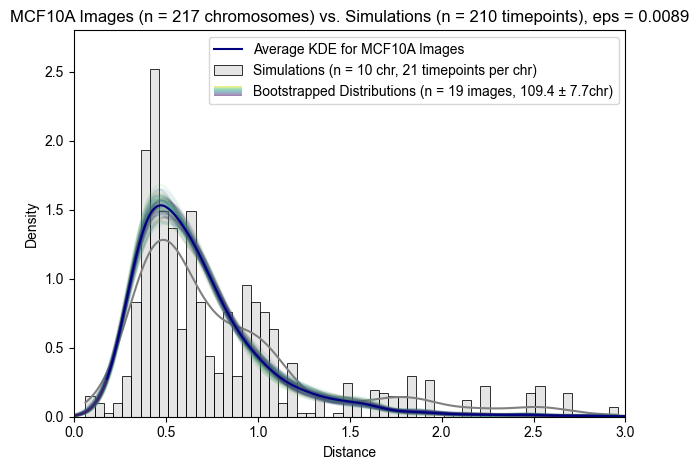

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {210//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {MCF10A_image_n} images, {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim.pdf")

<ipython-input-95-3e4006d64679>:13: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-95-3e4006d64679>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


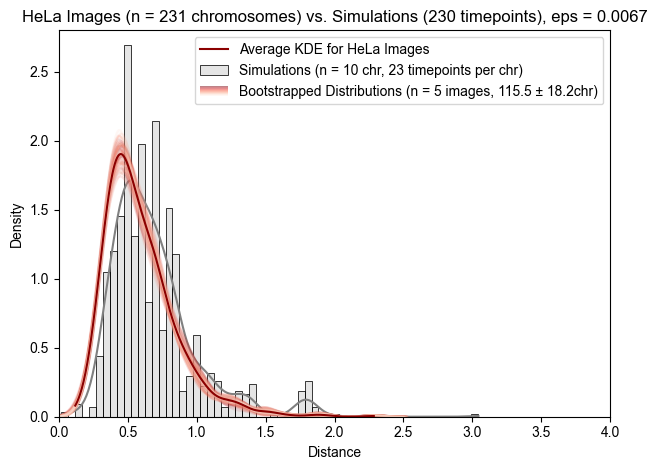

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {231//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#              palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {HeLa_image_n} images, {np.round(np.mean(HeLa_chr_n),1)} ± {np.round(np.std(HeLa_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()
# plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim.pdf")

<ipython-input-96-56e12f8dd669>:13: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-96-56e12f8dd669>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},


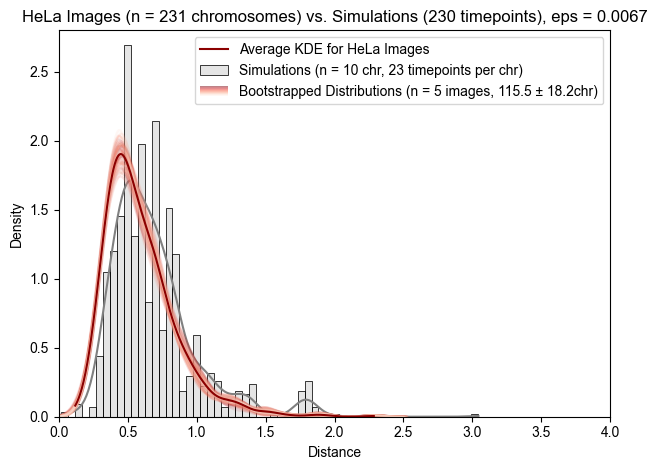

<Figure size 640x480 with 0 Axes>

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {231//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#              palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {HeLa_image_n} images, {np.round(np.mean(HeLa_chr_n),1)} ± {np.round(np.std(HeLa_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim_v2.pdf")

<ipython-input-97-0c40ffc5dfde>:13: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-97-0c40ffc5dfde>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfon

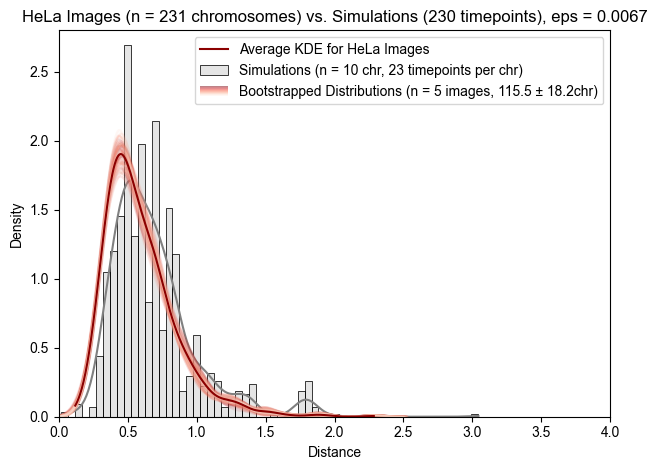

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {231//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#              palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {HeLa_image_n} images, {np.round(np.mean(HeLa_chr_n),1)} ± {np.round(np.std(HeLa_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim_v2.pdf")

<ipython-input-98-bf029b956c44>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfo

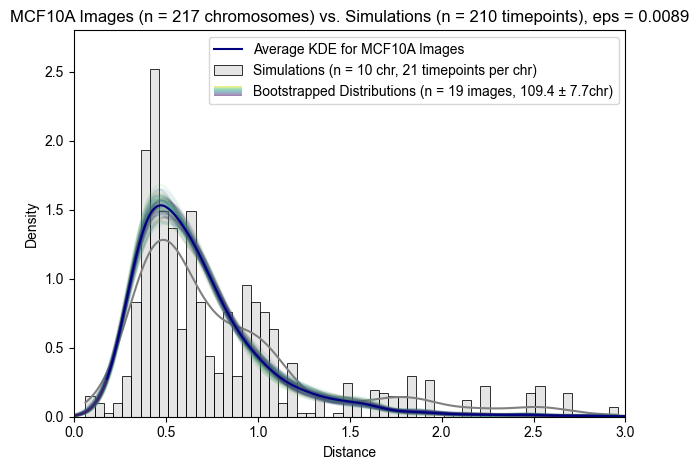

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {210//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {MCF10A_image_n} images, {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim_v2.pdf")

In [ ]:
outdir = (
    f"{indir}/distance_between_droplets/"
)

x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {210//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints), eps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {MCF10A_image_n} images, {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim_v2.pdf")
plt.close()

<ipython-input-99-b31b548d0c42>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfo

<ipython-input-100-0c40ffc5dfde>:13: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-100-0c40ffc5dfde>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 

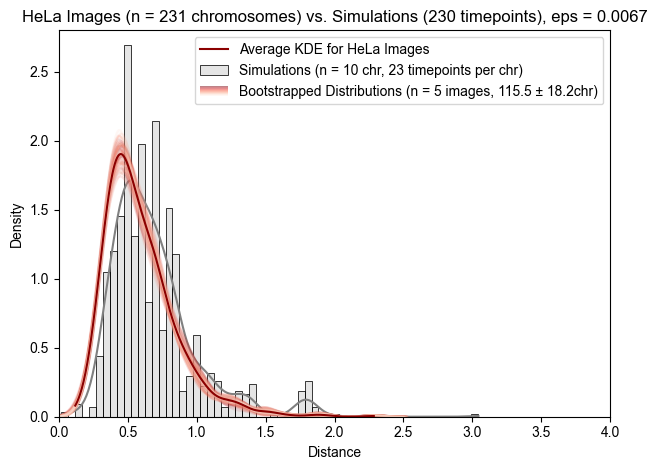

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {231//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#              palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {HeLa_image_n} images, {np.round(np.mean(HeLa_chr_n),1)} ± {np.round(np.std(HeLa_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim_v2.pdf")

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {231//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#              palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images")
plt.ylim(0, 2.8)
plt.xlim(0, 4)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), \n eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {HeLa_image_n} images, {np.round(np.mean(HeLa_chr_n),1)} ± {np.round(np.std(HeLa_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim_v2.pdf")
plt.close()

<ipython-input-101-a50af045b818>:13: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-101-a50af045b818>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 

In [ ]:
outdir = (
    f"{indir}/distance_between_droplets/"
)

x_eval, avg_kde = compute_kde(bootstrapped_df_MCF10A)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {210//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0089'], x="distance",
#  stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#  palette="tab10")

sns.kdeplot(
    data=bootstrapped_df_MCF10A,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("viridis", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="navy",
             label=f"Average KDE for MCF10A Images")

plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("MCF10A Images (n = 217 chromosomes) vs. Simulations (n = 210 timepoints),\neps = 0.0089")
# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {MCF10A_image_n} images, {np.round(np.mean(MCF10A_chr_n),1)} ± {np.round(np.std(MCF10A_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("viridis"), alpha=0.5)},
    loc='upper right')

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/MCF10A_images_bootstrapped_vs_0.0089_sim_v2.pdf")
plt.close()

<ipython-input-102-999ac2c89248>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("viridis"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findf

In [ ]:
x_eval, avg_kde = compute_kde(bootstrapped_df)
n_chr_sim = len(
    long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067']['cpc'].unique())
sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
             stat='density', binwidth=0.05, common_norm=False,  color="gray", alpha=0.2, kde=True,
             label=f"Simulations (n = {n_chr_sim} chr, {231//n_chr_sim} timepoints per chr)")

# sns.histplot(data=long_dist_df.loc[long_dist_df["Category"] == 'eps = 0.0067'], x="distance",
#              stat='density', binwidth=0.05, common_norm=True, alpha=0.5, multiple='stack', hue="cpc",
#              palette="tab10")

sns.kdeplot(
    data=bootstrapped_df,
    x="distance",
    hue="Category",
    common_norm=False,
    alpha=0.1,
    legend=False,
    palette=sns.color_palette("Reds", n_colors=101),
)

sns.lineplot(x=x_eval, y=avg_kde, color="DarkRed",
             label="Average KDE for HeLa Images")
plt.ylim(0, 2.8)
plt.xlim(0, 3)

plt.xlabel("Distance")
plt.ylabel("Density")
plt.title(
    "HeLa Images (n = 231 chromosomes) vs. Simulations (230 timepoints), \n eps = 0.0067")

# Use this to create a fake handle
gradient_patch = Rectangle((0, 0), 1, 1)  # dummy rectangle
handles, labels = plt.gca().get_legend_handles_labels()

# Add to the legend with custom handler
plt.legend(
    handles=[*handles, gradient_patch],
    labels=[
        *labels, f"Bootstrapped Distributions (n = {HeLa_image_n} images, {np.round(np.mean(HeLa_chr_n),1)} ± {np.round(np.std(HeLa_chr_n),1)}chr)"],
    handler_map={gradient_patch: HandlerVerticalGradient(
        cm.get_cmap("Reds"), alpha=0.5)},
    loc='upper right'
)

plt.tight_layout()
# plt.show()
plt.savefig(f"{outdir}/HeLa_images_bootstrapped_vs_0.0067_sim_v2.pdf")
plt.close()

<ipython-input-103-f671fa8b0a99>:13: UserWarning: The palette list has more values (101) than needed (100), which may not be intended.
  sns.kdeplot(
<ipython-input-103-f671fa8b0a99>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap("Reds"), alpha=0.5)},
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 

No kernel connected